In [1]:
# 1. Clustering the samples using DBscan on the 
# extracted features from T-SNE.
# 2. Create new data matrix with assigned classes 
# as features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import sys

### Do T-SNE for each gene.

In [2]:
f_path = '/Users/jerryliu/jerry_jupyter/internship/files/Gen_exp_1.0/'

In [3]:
f_name = os.listdir(f_path)[0]
print(f_name)
df = pd.read_csv(f'{f_path}{f_name}', index_col = 0)
df

TERT.csv


,DNASE:cerebellum male adult (27 years) and male adult (35 years),DNASE:frontal cortex male adult (27 years) and male adult (35 years),DNASE:chorion,DNASE:Ishikawa treated with 0.02% dimethyl sulfoxide for 1 hour,DNASE:GM03348,DNASE:GM03348 genetically modified using transduction treated with 3 ug/mL doxycycline for 10 days,DNASE:AG08395,DNASE:AG08396,DNASE:AG20443,DNASE:frontal cortex female adult (67 years) and female adult (80 years),...,"CAGE:thalamus, adult, , tech_","CAGE:putamen, adult, , tech_","CAGE:parietal cortex, adult,","CAGE:medial temporal gyrus, adult, , tech_",CAGE:squamous cell lung carcinoma cell line:LC-1F,CAGE:epithelioid sarcoma cell line:HS-ES-2R,CAGE:squamous cell lung carcinoma cell line:RERF-LC-AI,CAGE:gastric cancer cell line:GSS,CAGE:carcinoid cell line:NCI-H727,"CAGE:lung adenocarcinoma, papillary cell line:NCI-H441"
SRR8639135,5.437991,5.533497,10.688394,3.726749,4.868928,7.502786,1.776055,5.640727,4.449674,9.305103,...,9.641651,14.836637,0.749139,0.116547,24.458637,5.170943,10.155622,9.286105,27.566182,29.519804
SRR8639133,5.803415,6.124828,11.226565,3.930549,5.480475,8.466992,2.026671,6.392284,5.022992,10.266991,...,11.215608,19.193429,1.085127,0.183394,30.186561,7.482325,13.209238,11.419273,27.337371,33.716018
SRR8639139,0.358977,0.499254,0.592521,0.216233,0.173115,0.327862,0.069859,0.279100,0.190516,0.827196,...,0.674929,2.792529,0.221677,0.047878,1.531702,0.561645,0.727750,1.330290,0.643611,1.522628
SRR8639141,-0.136488,-0.167982,0.396067,0.308165,0.007017,-0.007741,0.052536,0.191432,0.106839,-0.073928,...,0.231410,1.213138,0.089386,0.043358,1.332746,0.619036,0.914113,0.315705,-0.798784,0.540383
SRR8639134,0.164522,0.206196,0.872453,0.586117,0.229939,0.402854,0.126526,0.416828,0.332297,0.526824,...,0.493387,2.086044,0.173602,0.052192,1.467513,0.568319,0.969827,0.624938,0.160098,1.251082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8670773,0.962225,1.063611,2.373844,1.294000,0.828639,1.587521,0.349297,1.206228,0.946746,2.114287,...,1.815478,4.880705,0.353651,0.085788,2.805800,1.029325,2.240176,2.539061,2.188900,4.102163
SRR8670772,0.018953,0.243837,0.793824,0.416433,0.144310,0.307012,0.075975,0.315563,0.222558,0.626834,...,0.272475,1.438559,0.086914,0.020757,1.122890,0.369601,0.420467,0.427608,-1.829345,-0.053860
SRR8670774,-0.049733,0.111009,0.242313,0.360345,0.035057,0.140832,0.037506,0.141756,0.105537,0.336817,...,0.370424,1.265356,0.138573,0.045582,0.434886,0.258316,0.450277,0.243424,-2.041859,-0.468020
SRR8670775,0.865433,1.153712,1.947732,0.744470,0.833632,1.394885,0.368483,1.191173,0.892646,1.752002,...,1.618208,6.373440,0.411459,0.080754,5.546357,0.941874,1.907652,1.911605,-1.347830,2.999943


In [4]:
RS = 123
tsne = TSNE(random_state=RS, perplexity = 20).fit_transform(df.values)

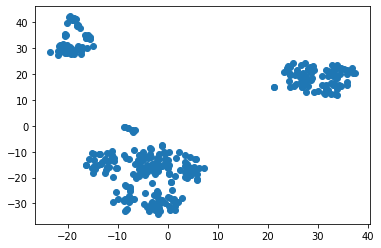

In [5]:
plt.scatter(tsne[:,0], tsne[:,1])

### DBSCAN 

In [6]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(tsne)
distances, indices = nbrs.kneighbors(tsne)

In [7]:
distances

array([[0.        , 0.48744265, 0.6748909 , 0.73227167],
       [0.        , 0.15944881, 0.45507807, 0.85242291],
       [0.        , 2.78061936, 2.78288569, 3.06591235],
       ...,
       [0.        , 0.81942029, 0.9025122 , 0.97500432],
       [0.        , 1.01970021, 1.18697746, 1.29769675],
       [0.        , 0.42455539, 0.78812307, 1.07955435]])

In [8]:
np.sort(distances, axis = 0)

array([[0.00000000e+00, 1.40010336e-03, 2.55172167e-01, 2.95720410e-01],
       [0.00000000e+00, 1.40010336e-03, 2.59825263e-01, 3.32715470e-01],
       [0.00000000e+00, 3.64257676e-02, 2.80677623e-01, 3.32715470e-01],
       ...,
       [0.00000000e+00, 2.47466124e+00, 3.09538956e+00, 3.59332188e+00],
       [0.00000000e+00, 2.78061936e+00, 3.09678255e+00, 3.83665043e+00],
       [0.00000000e+00, 3.30212862e+00, 3.40146663e+00, 3.83788376e+00]])

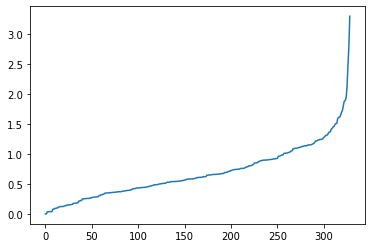

In [9]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [10]:
distances[-1]

3.3021286194053485

In [11]:
epsilon = 3.5
min_samples = 4

In [12]:
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(tsne)
labels = db.labels_

In [13]:
print(len(np.unique(labels)))

4


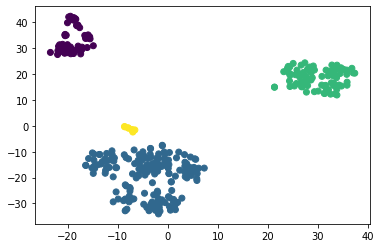

In [14]:
x = tsne[ (labels != -1) ,0]; y = tsne[(labels!= -1), 1]
out_x = tsne[ (labels == -1) ,0];  out_y = tsne[(labels == -1),1]
plt.scatter(x, y, c = labels[(labels != -1)])
plt.scatter(out_x, out_y, c = 'black')

plt.show()

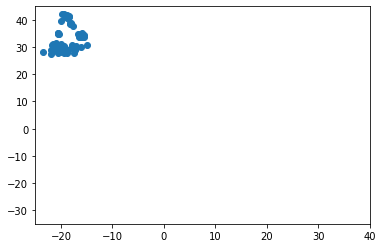

In [35]:
LAB = 0
x = tsne[labels == LAB, 0]; y = tsne[labels == LAB, 1]
plt.scatter(x,y);
plt.xlim(-25,40);
plt.ylim(-35,45)
plt.show()

In [19]:
from collections import Counter
Counter(labels)

Counter({0: 57, 1: 176, 2: 87, 3: 9})

In [20]:
pd.get_dummies(labels, prefix=f'clu').sum()

clu_0     57
clu_1    176
clu_2     87
clu_3      9
dtype: int64

### build ElasticNet on the new matrix

#### Process the index of drug data and genetics data.

In [24]:
DF = pd.read_csv('/Users/jerryliu/jerry_jupyter/internship/files/DB_clusters.csv', index_col = 0)

In [25]:
DF

,RHOA_clu_-1,RHOA_clu_0,RHOA_clu_1,RHOA_clu_2,RHOA_clu_3,RHOA_clu_4,RHOA_clu_5,RHOA_clu_6,RHOA_clu_7,SKI_clu_0,...,RPL10_clu_0,RPL10_clu_1,RPL10_clu_2,MTCP1_clu_-1,MTCP1_clu_0,MTCP1_clu_1,MTCP1_clu_2,MTCP1_clu_3,MTCP1_clu_4,MTCP1_clu_5
SRR8639135,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
SRR8639133,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
SRR8639139,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
SRR8639141,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
SRR8639134,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8670773,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
SRR8670772,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
SRR8670774,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
SRR8670775,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [31]:
DF.loc[:, DF.columns.map(lambda x:True if 'TERT' in x else False)].sum()

TERT_clu_0     57
TERT_clu_1    176
TERT_clu_2     87
TERT_clu_3      9
dtype: int64

In [121]:
# Import target vector
drug_file = "/Users/jerryliu/Documents/Vu_uva/internship/CCLE/Drug_sensitivity_AUC.csv"
sra_info = "/Users/jerryliu/Documents/Vu_uva/internship/CCLE/sra_result.csv"
run_info = "/Users/jerryliu/Documents/Vu_uva/internship/CCLE/SraRunInfo.csv"
sample_info_file = "/Users/jerryliu/Documents/Vu_uva/internship/CCLE/sample_info.csv"

In [122]:
target_df = pd.read_csv(drug_file, index_col = 0)

# remove drug columns with multiple treatments.
target_df =  target_df.loc[: , target_df.columns.map(lambda x:x.split('(CTRP')[0].strip().count(':') != 2)]


In [123]:
# find a mapping between Depmap and run ids.
sample_df = pd.read_csv(sample_info_file)
run_df = pd.read_csv(run_info, index_col = 'SampleName')

In [124]:
run_df.head()

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
SampleName,,,,,,,,,,,,,,,,,,,,,
DANG_PANCREAS,SRR8788980,2019-03-27 12:26:01,2019-03-27 01:00:31,683375730,138041897460,683375730,202,64254,GCA_000001405.13,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,BROAD INSTITUTE,SRA866246,NaN,public,D13DAF0E2CCE7B0F54D563CAF4421814,DDA349F665EB4DADAFF1A04D64F99A39
DMS114_LUNG,SRR8788981,2019-03-27 12:26:01,2019-03-27 02:40:29,667196861,134773765922,667196861,202,66600,GCA_000001405.13,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,BROAD INSTITUTE,SRA866246,NaN,public,AF46E7EBD76DA96500BCE0A592DAB632,EF9D571312DA60ADF0B14E0692BC7105
DMS273_LUNG,SRR8788982,2019-03-27 12:26:01,2019-03-27 00:22:54,553557490,111818612980,553557490,202,57425,GCA_000001405.13,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,BROAD INSTITUTE,SRA866246,NaN,public,E66D9ADC0A4DA0899BCDCCD31BEF47F0,D675C7885DB55D1B648DFD7AAFDE4DB8
NCIH446_LUNG,SRR8670688,2019-03-27 12:26:00,2019-03-05 22:03:49,612360060,123696732120,612360060,202,62871,GCA_000001405.13,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,BROAD INSTITUTE,SRA856073,NaN,public,EA4002EF95A2795584B2D950CCF47C3A,5D106D2CA0A009BA21E2A2F4BE044B86
NCIH460_LUNG,SRR8670687,2019-03-27 12:26:00,2019-03-05 18:53:59,616206594,124473731988,616206594,202,56210,GCA_000001405.13,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,BROAD INSTITUTE,SRA856073,NaN,public,643A7E69DDC2841FBE462A9D65A20FA0,789C003C0AF0BE254B3C1813609B037F


In [125]:
mapping = sample_df.loc[:, ['DepMap_ID', 'CCLE_Name']].set_index(['CCLE_Name'])
mapping = mapping.loc[run_df.index,:]
mapping['Run'] = run_df.Run
mapping


,DepMap_ID,Run
CCLE_Name,,
DANG_PANCREAS,ACH-000243,SRR8788980
DMS114_LUNG,ACH-000530,SRR8788981
DMS273_LUNG,ACH-000749,SRR8788982
NCIH446_LUNG,ACH-000800,SRR8670688
NCIH460_LUNG,ACH-000463,SRR8670687
...,...,...
G401_SOFT_TISSUE,ACH-000096,SRR8639237
G402_SOFT_TISSUE,ACH-000375,SRR8639240
GAMG_CENTRAL_NERVOUS_SYSTEM,ACH-000098,SRR8639239


In [126]:
consensus_runs = mapping.DepMap_ID.isin(target_df.index).values
mapping = mapping.loc[consensus_runs,:]

In [127]:
target_df = target_df.loc[mapping.DepMap_ID,: ]

In [128]:
target_df = target_df.set_index([target_df.index, mapping.reset_index().
                     set_index('DepMap_ID').loc[target_df.index,:].Run])

In [129]:
target_df.head()

,,CIL56 (CTRP:100490),FQI-1 (CTRP:102193),BRD-K92856060 (CTRP:119769),B02 (CTRP:122255),BRD6340 (CTRP:12877),BRD-K45681478 (CTRP:142931),ML050 (CTRP:153820),ML162 (CTRP:154846),CIL41 (CTRP:176181),ML006 (CTRP:17712),...,AT13387 (CTRP:688229),BCL-LZH-4 (CTRP:688516),skepinone-L (CTRP:688799),BRD-K34222889 (CTRP:688888),PF-4800567 (CTRP:688962),avicin D (CTRP:688975),BRD-K30748066 (CTRP:689506),linsitinib (CTRP:705300),AT-406 (CTRP:710154),ML031 (CTRP:96171)
,Run,,,,,,,,,,,,,,,,,,,,,
ACH-000243,SRR8788980,NaN,NaN,14.4500,9.5289,12.735,14.6120,14.918,14.2030,NaN,13.105,...,8.8116,13.458,14.653,11.5460,13.003,8.6261,NaN,11.7770,NaN,12.1870
ACH-000530,SRR8788981,NaN,NaN,12.2600,12.8590,14.365,13.2630,14.366,9.8815,NaN,14.258,...,8.2896,13.902,14.682,11.0540,13.602,10.8320,9.9368,13.8910,14.576,NaN
ACH-000749,SRR8788982,NaN,NaN,14.4060,12.4490,14.473,14.3530,14.786,8.5221,NaN,13.526,...,10.8470,14.966,14.326,10.8010,14.910,11.1320,NaN,14.5870,14.517,14.2400
ACH-000800,SRR8670688,10.9260,11.247,14.1910,11.9580,13.087,13.3970,13.489,6.5636,12.5130,11.840,...,NaN,NaN,NaN,9.9177,NaN,NaN,NaN,14.1930,14.468,12.4730
ACH-000463,SRR8670687,14.6325,13.964,15.7605,14.6085,14.727,14.1105,15.451,14.4860,14.7095,14.884,...,NaN,NaN,NaN,13.9110,NaN,NaN,NaN,13.8385,14.054,14.1515


In [130]:
DF = DF.loc[mapping.Run]

In [131]:
DF = DF.set_index([mapping.reset_index().set_index(['Run']).
                          loc[DF.index,:].DepMap_ID, DF.index])

In [132]:
DF

,,RHOA_clu_-1,RHOA_clu_0,RHOA_clu_1,RHOA_clu_2,RHOA_clu_3,RHOA_clu_4,RHOA_clu_5,RHOA_clu_6,RHOA_clu_7,SKI_clu_0,...,RPL10_clu_0,RPL10_clu_1,RPL10_clu_2,MTCP1_clu_-1,MTCP1_clu_0,MTCP1_clu_1,MTCP1_clu_2,MTCP1_clu_3,MTCP1_clu_4,MTCP1_clu_5
DepMap_ID,,,,,,,,,,,,,,,,,,,,,,
ACH-000243,SRR8788980,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
ACH-000530,SRR8788981,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
ACH-000749,SRR8788982,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
ACH-000800,SRR8670688,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
ACH-000463,SRR8670687,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000572,SRR8639238,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
ACH-000096,SRR8639237,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
ACH-000375,SRR8639240,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [14]:
DF

NameError: name 'DF' is not defined

#### Build model

In [37]:
sys.path.append('/Users/jerryliu/jerry_jupyter/internship/code/PCA')

In [38]:
from ElasticNetModules import EN_cv_in, out_loop, drug_model

In [39]:
# get rid of drugs with too many missing values.
thresh  = int(target_df.shape[0]*(0.80)) ## at least 80% of Non-na value in each drug
drug_df_ = target_df.dropna(axis = 1, thresh = thresh)
print(f'before filtering drugs: the number of drugs is {target_df.shape[1]}')
print(f'after filtering, the number of drugs is {drug_df_.shape[1]}')
print(f'Shape of drug data: {drug_df_.shape}')


before filtering drugs: the number of drugs is 494
after filtering, the number of drugs is 359
Shape of drug data: (291, 359)


In [139]:
comp_index = 0
target = drug_df_.iloc[:,comp_index]
out_path = '.'
pre = drug_model(DF, target, out_path=out_path, norm_bool = True) 



processing drug: BRD-K92856060 (CTRP:119769)
### normalize with mean=0, std = 1.
number of features selected 5135
Dimension of the final matrix: (262, 5135)
iteration 0 begains
{(0.2, 3.059023205018258e-07): 0.10311522890353311, (0.2, 2.2603294069810542e-06): 0.08129940735167512, (0.2, 1.670170079024566e-05): -0.020086585718418044, (0.2, 0.00012340980408667956): -0.04885343071988677, (0.2, 0.0009118819655545162): -0.07656078443901268, (0.2, 0.006737946999085467): -0.15267844248923987, (0.2, 0.049787068367863944): -0.15250873504545026, (0.2, 0.36787944117144233): -0.14748562558942652, (0.2, 2.718281828459045): -0.13284913583038105, (0.2, 20.085536923187668): nan, (0.4, 3.059023205018258e-07): 0.10311522890353311, (0.4, 2.2603294069810542e-06): 0.09332746576744154, (0.4, 1.670170079024566e-05): 0.005986170266257491, (0.4, 0.00012340980408667956): -0.0489130397528349, (0.4, 0.0009118819655545162): -0.12736791230691416, (0.4, 0.006737946999085467): -0.14987337498192516, (0.4, 0.04978706836

KeyboardInterrupt: 

#### correlation with test set

In [212]:
import importlib
importlib.reload(scipy)

<module 'scipy' from '/Users/jerryliu/anaconda3/lib/python3.8/site-packages/scipy/__init__.py'>

In [40]:
import scipy
from statsmodels.stats.multitest import fdrcorrection

In [41]:
path = '/Users/jerryliu/jerry_jupyter/internship/files/Model2_DBSCAN/'

In [42]:
file_list = os.listdir(path)
drug_list = [i[5:-4] for i in file_list]
cor_list = []; index = []; p_list = []
for i in file_list:
    prediction = pd.read_csv(path+i)
    prediction.set_index( ['Unnamed: 0','Run'], inplace = True )
    prediction.iloc[:,0 ] = prediction.iloc[:,0].map(lambda x:[ float(i) for i in x[1:-1].split(', ') ])
    test = drug_df_.loc[prediction.index,i[5:-4]]
    index.append(i[5:-4])
    r,p = scipy.stats.spearmanr(test, prediction.iloc[:,0].map(lambda x:np.mean(x)), alternative = 'greater')
    cor_list.append(r)
    p_list.append(p)

In [45]:
r_result  = pd.DataFrame({'drug':drug_list, 'r_value': cor_list, 'p_value':p_list})
r_result.sort_values(by = ['r_value'])

,drug,r_value,p_value
323,BRD-K37390332 (CTRP:463198),-0.204496,0.999630
35,BIX-01294 (CTRP:53705),-0.160230,0.995826
68,SJ-172550 (CTRP:416777),-0.158669,0.995230
158,sirolimus (CTRP:56703),-0.151397,0.994181
302,TGX-221 (CTRP:606356),-0.149732,0.993618
...,...,...,...
286,CI-976 (CTRP:375390),0.218232,0.000182
48,TW-37 (CTRP:609596),0.222553,0.000127
312,valdecoxib (CTRP:32372),0.227649,0.000083
154,vemurafenib (CTRP:649420),0.234288,0.000045


Text(0.5, 0, 'spearman r')

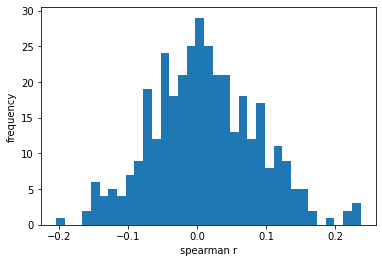

In [46]:
plt.hist(cor_list, bins = 35)
plt.ylabel('frequency')
plt.xlabel('spearman r')

Text(0.5, 0, 'P-value')

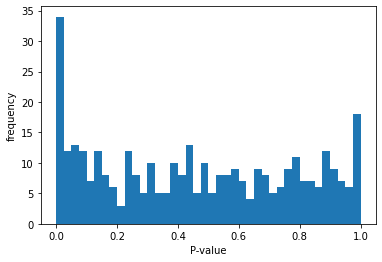

In [47]:
plt.hist(p_list, bins = 40)
plt.ylabel('frequency')
plt.xlabel('P-value')

In [48]:
rejected, corrected_s = fdrcorrection(p_list, alpha=0.05, method='indep', is_sorted=False)
rejected.sum()

6

In [49]:
r_result.iloc[rejected,:]

,drug,r_value,p_value
48,TW-37 (CTRP:609596),0.222553,0.000127
57,BI-2536 (CTRP:347813),0.189849,0.000766
154,vemurafenib (CTRP:649420),0.234288,0.000045
286,CI-976 (CTRP:375390),0.218232,0.000182
312,valdecoxib (CTRP:32372),0.227649,0.000083
343,gossypol (CTRP:25036),0.237154,0.000060


In [161]:
i = 'comp_vemurafenib (CTRP:649420).csv'
prediction = pd.read_csv(path+i)
prediction.set_index( ['Unnamed: 0','Run'], inplace = True )
prediction.iloc[:,0 ] = prediction.iloc[:,0].map(lambda x:[ float(i) for i in x[1:-1].split(', ') ])
test = drug_df_.loc[prediction.index,i[5:-4]]

In [167]:
prediction.iloc[:,0].map(np.mean)

Unnamed: 0  Run       
ACH-000243  SRR8788980    13.313417
ACH-000530  SRR8788981    13.778351
ACH-000749  SRR8788982    13.004618
ACH-000800  SRR8670688    13.255911
ACH-000463  SRR8670687    14.868133
                            ...    
ACH-000572  SRR8639238    13.116021
ACH-000096  SRR8639237    14.199167
ACH-000375  SRR8639240    13.240441
ACH-000098  SRR8639239    14.181172
ACH-000738  SRR8639232    15.003255
Name: vemurafenib (CTRP:649420), Length: 274, dtype: float64

In [168]:
test

Unnamed: 0  Run       
ACH-000243  SRR8788980    10.5750
ACH-000530  SRR8788981    14.8470
ACH-000749  SRR8788982    14.7540
ACH-000800  SRR8670688    13.8250
ACH-000463  SRR8670687    15.1035
                           ...   
ACH-000572  SRR8639238    13.2440
ACH-000096  SRR8639237    15.9630
ACH-000375  SRR8639240    14.5620
ACH-000098  SRR8639239    14.6150
ACH-000738  SRR8639232    14.7490
Name: vemurafenib (CTRP:649420), Length: 274, dtype: float64

Text(0.5, 0, 'prediction')

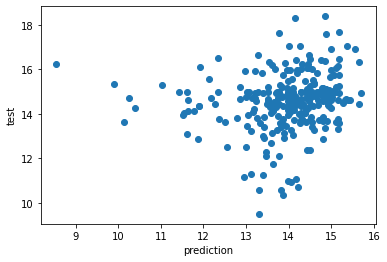

In [169]:
plt.scatter(prediction.iloc[:,0].map(np.mean), test)
plt.ylabel('test')
plt.xlabel('prediction')

#### implement feature selection

In [118]:
sig_d = pd.Series(['TW-37 (CTRP:609596)', 'BI-2536 (CTRP:347813)', 'vemurafenib (CTRP:649420)',
     'CI-976 (CTRP:375390)', 'valdecoxib (CTRP:32372)', 'gossypol (CTRP:25036)'], index = [238, 46, 286, 69, 39, 16])

drug_df_.loc[:, sig_d.values]

,,TW-37 (CTRP:609596),BI-2536 (CTRP:347813),vemurafenib (CTRP:649420),CI-976 (CTRP:375390),valdecoxib (CTRP:32372),gossypol (CTRP:25036)
,Run,,,,,,
ACH-000243,SRR8788980,11.1060,8.0202,10.5750,15.0000,14.098,12.8030
ACH-000530,SRR8788981,11.1480,5.2769,14.8470,14.3680,13.301,12.9440
ACH-000749,SRR8788982,11.0860,7.1863,14.7540,14.6860,12.990,12.1850
ACH-000800,SRR8670688,11.1800,3.7315,13.8250,14.8260,11.781,12.8040
ACH-000463,SRR8670687,12.6535,9.2851,15.1035,14.9985,12.510,13.2305
...,...,...,...,...,...,...,...
ACH-000572,SRR8639238,11.7950,9.0504,13.2440,15.2550,12.211,13.4090
ACH-000096,SRR8639237,11.3880,4.8315,15.9630,NaN,12.166,12.1610
ACH-000375,SRR8639240,9.9919,4.0095,14.5620,13.6640,12.715,12.1120


In [66]:
sig_drugs = r_result.iloc[rejected,:].drug.values
sig_drug_df_ = drug_df_.loc[:,sig_drugs]

In [83]:
#mapping to the drug_df_
#pd.Series(sig_drugs, index = np.arange(drug_df_.shape[1])[list(drug_df_.columns.isin(sig_drugs))])
sig_index = sig_drug_df_.columns.map(lambda x: np.arange(drug_df_.shape[1])[list(drug_df_.columns.isin([x]))][0])

In [109]:
sig_drugs = pd.Series(sig_drugs, index = sig_index)


238          TW-37 (CTRP:609596)
46         BI-2536 (CTRP:347813)
286    vemurafenib (CTRP:649420)
69          CI-976 (CTRP:375390)
39       valdecoxib (CTRP:32372)
16         gossypol (CTRP:25036)
dtype: object

In [99]:
# select best pair of alpha and lambda
from ElasticNetModules import EN_cv_in
from sklearn.linear_model import ElasticNet
import math

In [90]:
comp_index = 0
target = sig_drug_df_.iloc[:,comp_index]

In [134]:
def select_para(m_file, target,  norm_bool=True,
                n_cv = 10,
                l1_range=np.linspace(start=0.2, stop=1.0, num=5),
                alpha_list=np.array([math.exp(i) for i in np.arange(-15, 5, 2)])
                ):
    """
    INPUT: m_file mutation matrix with unpreprocessed binery values.
    OUTPUT: optimal l1 ratio and alpha
    FUNCTION: conduct normalization + 10 times of CV
    """
    # eliminate cell lines with nan drug sensitivity data.
    drug_name = target.name
    Y = target.dropna()
    m_file_notna = m_file.loc[Y.index, :]
    print(f'processing drug: {drug_name}')
    # normalize the each col to have ~0 mean and ~1 sd.
    # old normalization method:
    # norm_m_file = (m_file_notna - m_file_notna.mean(axis = 0)) / m_file_notna.std(axis = 0)

    if norm_bool:
        norm_m_file = tools.scal_matrix(m_file_notna)
        print('### normalize with mean=0, std = 1.', flush=True)
    elif not norm_bool:
        norm_m_file = m_file_notna
        print('### using raw data to fit model', flush=True)

    norm_m_file.dropna(axis=1, inplace=True)
    print('number of features selected {}'.format(norm_m_file.shape[1]), flush=True)
    print(f'Dimension of the final matrix: {norm_m_file.shape}', flush=True)
    X, Y_total = norm_m_file, Y

    ### EN model
    ## bootstraping (80% of data) for 10 times.

    cl_id = norm_m_file.index

    para_matrix = {(l1_ratio, alpha): 0 for l1_ratio in l1_range for alpha in alpha_list}
    for i in range(n_cv):
        print('iteration {} begains'.format(i), flush=True)
        # resample 80% of data
        x, y_total = resample(X, Y_total,
                              replace=False, n_samples=int(X.shape[0] * 0.95), random_state=i)

        # 8-fold cross validation for each pair of parameter
        for (l1_ratio, alpha) in para_matrix:
            # do ten fold cv to sellect best parameter pairs.
            ave_per = EN_cv_in(x_train=x.values, y_train=y_total.values, fold=8, alpha=alpha, l1_ratio=l1_ratio)
            para_matrix[(l1_ratio, alpha)] += ave_per
        print(f'CV {i} done, total {n_cv}', flush=True)
    op_l1_ratio, op_alpha = pd.Series(para_matrix).idxmax()

    return {'arguments': (op_l1_ratio, op_alpha),
            'processed_x': X,
            'processed_y': Y_total}


In [136]:
sys.path.append('/Users/jerryliu/jerry_jupyter/internship/code/PCA')
import importlib
importlib.reload(ElasticNetModules)

<module 'ElasticNetModules' from '/Users/jerryliu/jerry_jupyter/internship/code/PCA/ElasticNetModules.py'>

In [137]:
from ElasticNetModules import EN_cv_in, out_loop, drug_model, select_fea, select_para

In [139]:
output_item = select_para(DF, target,  norm_bool = True, n_cv=1,
               l1_range= np.linspace(start=0.2, stop=1.0, num=1),
               alpha_list=np.array([math.exp(i) for i in np.arange(-15, 5, 5)])
               )
op_l1_ratio, op_alpha = output_item['arguments']
X, Y  = output_item['processed_x'], output_item['processed_y']

processing drug: TW-37 (CTRP:609596)
### normalize with mean=0, std = 1.
number of features selected 5135
Dimension of the final matrix: (266, 5135)
iteration 0 begains
CV 0 done, total 1


In [105]:
# resample the dataset 100 times and fit the model
def select_fea(X, Y, alpha, l1_ratio, random_state = 0):

    X, Y = resample(X, Y, replace=False, n_samples=int(X.shape[0] * 0.95), random_state=random_state)
    regr = ElasticNet(random_state=i, alpha=alpha, l1_ratio=l1_ratio,
                                  fit_intercept=False, max_iter= 2000)
    regr.fit(X, Y)
    return (regr.coef_)

In [141]:
w_list = []
for i in range(2):
    w = select_fea(X = X, Y = Y, alpha= op_alpha, l1_ratio= op_l1_ratio, random_state= i)
    w_list.append(w)
w_list = pd.DataFrame(w_list, columns=DF.columns)



#### interprete important features by mean 

In [12]:
import os
import seaborn as sns; sns.set_theme(color_codes=True)

In [4]:
feature_path = '/Users/jerryliu/jerry_jupyter/internship/files/feature_selec_out'

In [202]:
f_list = os.listdir(feature_path)
f_index = 5
drug_name = f_list[f_index].split()[0].strip()
f  = pd.read_csv(f'{feature_path}/{f_list[f_index]}', index_col = 0)
print(f'drug name: {f_list[f_index].split()[0].strip()}')


IndexError: list index out of range

In [196]:
top_n = 10
top10pos_index = f.apply(np.mean).sort_values(ascending=False).index[:int(top_n/2)]
top10neg_index = f.apply(np.mean).sort_values().index[:int(top_n/2)]
top20_index = np.concatenate((top10pos_index, top10neg_index))
top20 = f.apply(np.mean)[top20_index]
std20 = f.apply(np.std)[top20_index]

# plt.figure(figsize=(10, 3))
# plt.bar(top20.index, top20.values);
# #plt.errorbar(top20.index, top20.values, yerr=std20, fmt="o", color="r");
# plt.xticks(rotation=30, ha='right');
# plt.xlabel('Features');
# plt.ylabel('Coefficients');




In [197]:
top20g = np.unique(top20.index.map(lambda x: x.split('_clu_')[0] ))
top20g_index = DF.columns.map(lambda x:  x.split('_clu_')[0] ).isin(top20g)

In [198]:
DF = pd.read_csv('/Users/jerryliu/jerry_jupyter/internship/files/DB_clusters.csv', index_col = 0)
run_df = pd.read_csv("/Users/jerryliu/Documents/Vu_uva/internship/CCLE/SraRunInfo.csv")


In [208]:
DF.shape

(329, 5135)

In [199]:
DF_ = DF.set_index([DF.index, 
              run_df.set_index('Run')['SampleName'][DF.index].map(lambda x:x.split('_',1)[1]).values])

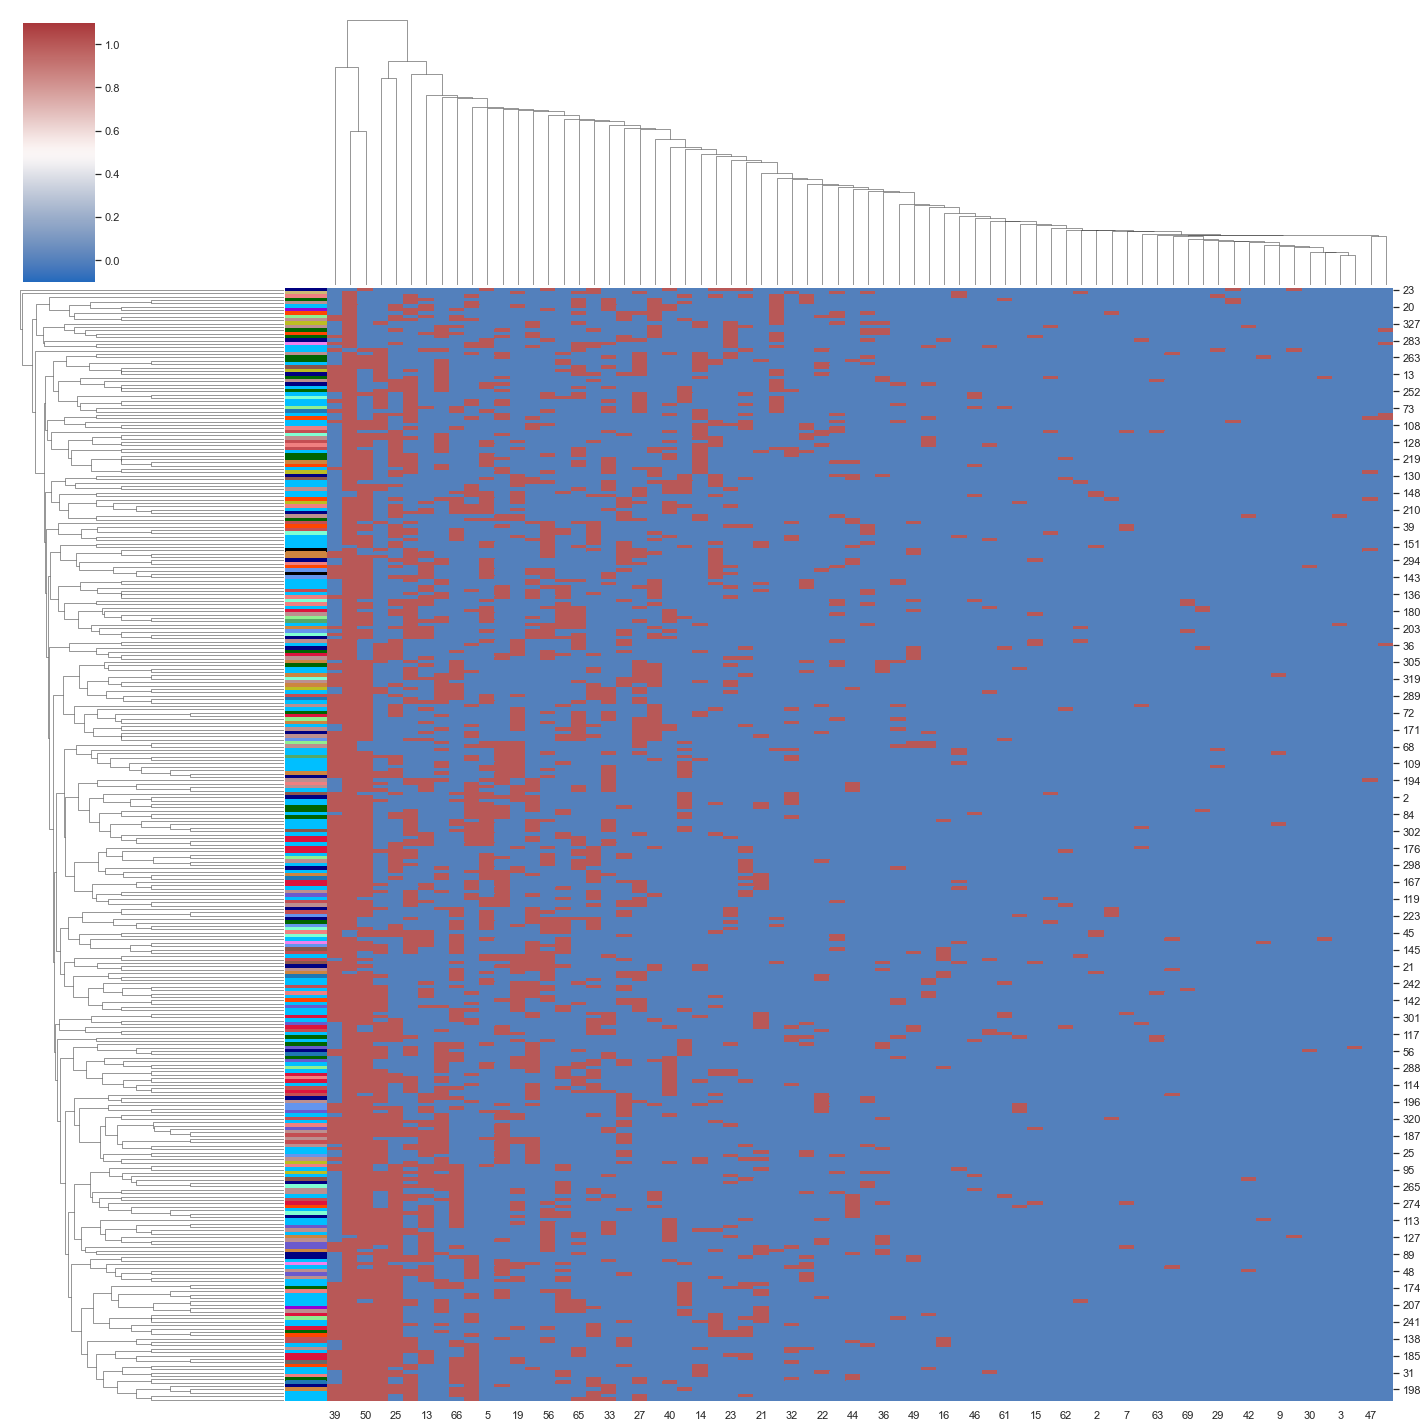

In [200]:

colors = ['black', 'dimgray', 'rosybrown', 'lightcoral', 'orangered', 'peru', 'lightgreen',
         'darkgreen', 'aquamarine', 'deepskyblue', 'cornflowerblue', 'navy', 'slateblue',
         'darkviolet', 'violet', 'crimson', 'y','tab:olive', 'r', 'g','tab:blue','tab:brown' ]

tissue_map = dict(zip(np.unique(DF_.index.map(lambda x:x[1])), colors  ))

col_map = DF_.index.map(lambda x:x[1]).map(tissue_map)
g = sns.clustermap(DF_.loc[:,top20g_index].values, col_cluster = True, row_colors=list(col_map), cmap="vlag", 
                   figsize=(20, 20),
                   vmin=-0.1, vmax=1.1)
g.savefig(f'/Users/jerryliu/jerry_jupyter/internship/files/figures/feature_selection/top10g/{drug_name}_clu.pdf')

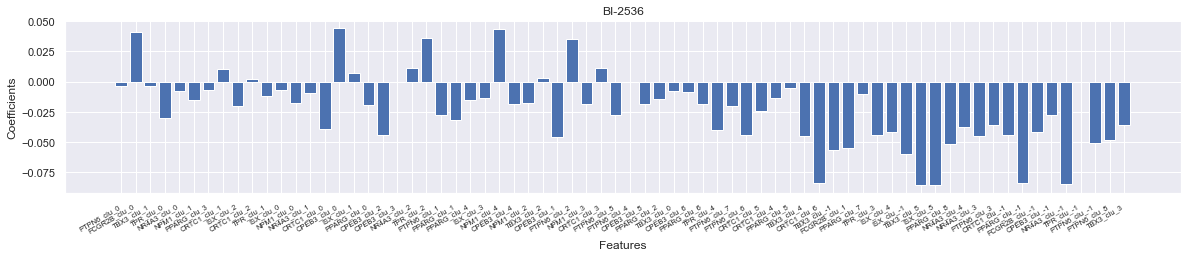

In [201]:
top_genes = f.apply(np.mean)[DF_.loc[:,top20g_index].columns[g.dendrogram_col.reordered_ind ]]


plt.figure(figsize=(20, 5))
plt.bar(top_genes.index, top_genes.values);
plt.xticks( rotation=30, ha='right', fontsize = 7.5);
plt.subplots_adjust(bottom=0.4);
plt.xlabel('Features');
plt.ylabel('Coefficients');
plt.title(drug_name)
plt.savefig(f'/Users/jerryliu/jerry_jupyter/internship/files/figures/feature_selection/top10g/{drug_name}.pdf')

In [78]:
def print_mean_coe(f, drug_name, top_n = 10, fea_order = '', show = True, save = False):
    top10pos_index = f.apply(np.mean).sort_values(ascending=False).index[:int(top_n/2)]
    top10neg_index = f.apply(np.mean).sort_values().index[:int(top_n/2)]
    top20_index = np.concatenate((top10pos_index, top10neg_index))
    top20 = f.apply(np.mean)[top20_index]
    
    plt.figure(figsize=(10, 2.5))
    plt.bar(top20.index, top20.values);
    plt.xticks(rotation=30, ha='right');
    plt.subplots_adjust(bottom=0.4);
    plt.xlabel('Features');
    plt.ylabel('Coefficients');
    plt.title(drug_name)
    if save: 
        plt.savefig(f'/Users/jerryliu/jerry_jupyter/internship/files/figures/feature_selection/{drug_name}_20fea.pdf')
    if not show: plt.close()

In [45]:
for i in range(6):
    f  = pd.read_csv(f'{feature_path}/{f_list[i]}', index_col = 0)
    drug_name = f'{f_list[i].split()[0].strip()}'
    print_mean_coe(f, drug_name = drug_name, show = False, save  = True)

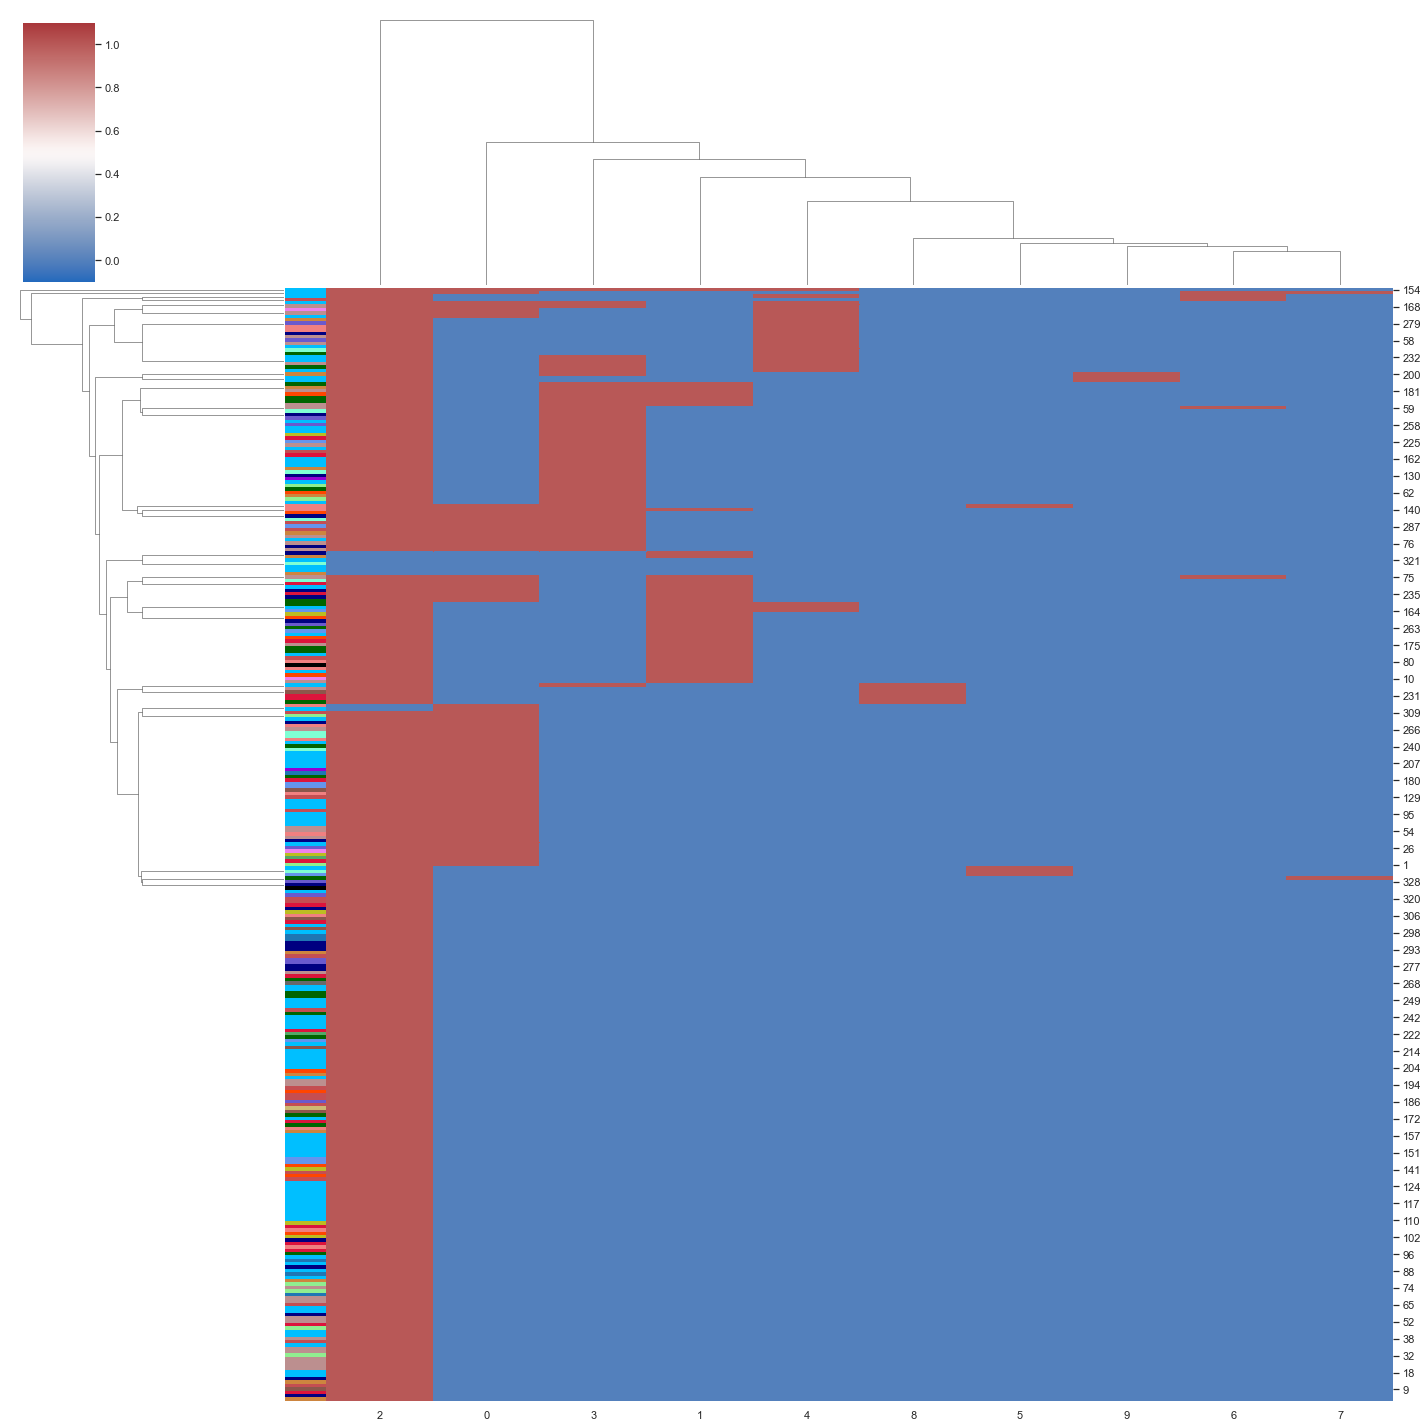

In [136]:
g = sns.clustermap(DF_.loc[:,top20_index].values, col_cluster = True, row_colors=list(col_map), cmap="vlag", 
                   figsize=(20, 20),
                   vmin=-0.1, vmax=1.1)

#### interprete feature importance by occerence

In [12]:
feature_path = '/Users/jerryliu/jerry_jupyter/internship/files/feature_selec_out'
f_list = os.listdir(feature_path)
print(f_list)
f_index = 2
f = pd.read_csv(f'{feature_path}/{f_list[f_index]}', index_col = 0)
drug_name = f_list[f_index].split()[0].strip()
print(drug_name)
f

['TW-37 (CTRP:609596).csv', 'CI-976 (CTRP:375390).csv', 'vemurafenib (CTRP:649420).csv', 'valdecoxib (CTRP:32372).csv', 'gossypol (CTRP:25036).csv', 'BI-2536 (CTRP:347813).csv']
vemurafenib


,RHOA_clu_-1,RHOA_clu_0,RHOA_clu_1,RHOA_clu_2,RHOA_clu_3,RHOA_clu_4,RHOA_clu_5,RHOA_clu_6,RHOA_clu_7,SKI_clu_0,...,RPL10_clu_0,RPL10_clu_1,RPL10_clu_2,MTCP1_clu_-1,MTCP1_clu_0,MTCP1_clu_1,MTCP1_clu_2,MTCP1_clu_3,MTCP1_clu_4,MTCP1_clu_5
0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.004116,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
1,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.000000,...,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
2,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.000000,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
3,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.000000,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
4,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.000000,...,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.000000,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
196,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.000000,...,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.000000,...,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
198,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.000000,...,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0


In [13]:
def show_features(f, drug_name, top_n = 20, show = True, save = False, save_path = ''):
    top_n = top_n

    ratio = f.apply(lambda x: (x != 0).sum()/200)
    top = f.apply(np.mean).sort_values(ascending=False)
    high_ocr_index = ratio.sort_values(ascending = False)[:int(5135*0.2)].index
    top_ = top[top.index.isin(high_ocr_index)]

    topn = pd.concat( [top_[:int(top_n/2)], top_[-(int(top_n/2)): ]] )
    xticks = topn.index.map(lambda x: f'{x} ({round(ratio[x], 2) })') 
    plt.figure(figsize=(10, 3))
    plt.bar(xticks, topn.values);
    plt.xticks( rotation=30, ha='right');
    plt.xlabel('features')
    plt.ylabel('coefficients')
    plt.title(drug_name)
    genes = np.unique(topn.index.map(lambda x: x.split('_clu_')[0] ))
    if save: plt.savefig(f'{save_path}/top{top_n}_{drug_name}.pdf')
    if not show: plt.close()
    
    return(topn, genes)


In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [15]:
def show_features_ocur(f, drug_name, sort_by_w = False, top_n = 20, show_weight = False,
                       show = True, save = False, save_path = ''):
    top_n = top_n
    
    ratio = f.apply(lambda x: (x != 0).sum()/200).sort_values(ascending = False)[:int(5135*0.2)]
    if sort_by_w:
        coef_pos = f.apply(np.mean)[ratio.index].sort_values(ascending = False)[:int(top_n/2)]
        coef_neg = f.apply(np.mean)[ratio.index].sort_values(ascending = False)[-int(top_n/2):]
        coef = pd.concat( [coef_pos, coef_neg] )
    elif not sort_by_w:
        coef = f.apply(np.mean)[ratio[:top_n].index]
    
    ratio_topn = ratio[:top_n]
    if not show_weight:
        xticks = coef.index.map(lambda x: f'{x} ({round(ratio[x], 2) })') 
        plt.figure(figsize=(10, 3))
        plt.bar(xticks, coef.values);
        plt.xticks( rotation=30, ha='right');
        plt.xlabel('Clusters', fontsize = 15)
        plt.ylabel('Mean \n coefficients', fontsize = 15)
        plt.title(drug_name, fontsize = 18)
        plt.subplots_adjust(bottom=0.5)
    elif show_weight:
        plt.figure(figsize=(10, 3));
        
        plt.bar(ratio_topn.index, ratio_topn.values);
        plt.bar_label(plt.bar(ratio_topn.index, ratio_topn.values));
        
        plt.xticks( rotation=30, ha='right');
        plt.xlabel('Clusters', fontsize = 15);
        #plt.ylabel('Percentage of \n datasets the feature presents in', fontsize = 15);
        plt.title(drug_name, fontsize = 18);
        plt.subplots_adjust(bottom=0.5);
        
        
    genes = np.unique(remove_outlier(coef.index).map(lambda x: x.split('_clu_')[0] ))
    if save: plt.savefig(f'{save_path}/top{top_n}features_{drug_name}.pdf')
    if not show: plt.close()    
    
    return(coef, genes)

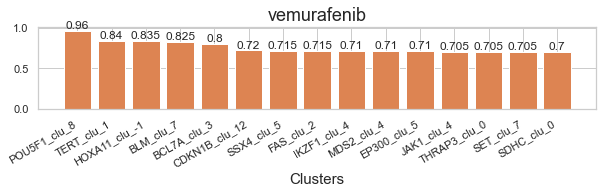

In [16]:
ratio, genes = show_features_ocur(f, drug_name = drug_name, sort_by_w= False, show_weight = True,
                                  top_n = 15, save= True,
                                  save_path = '/Users/jerryliu/jerry_jupyter/internship/files/figures/thesis_fig')

['ARHGAP5' 'CDC73' 'CDKN1B' 'CDKN2A' 'CIITA' 'EP300' 'FAS' 'HEY1' 'HOXA11'
 'IGF2BP2' 'ITK' 'LPP' 'PIM1' 'RNF43' 'SDHA' 'SET' 'STAG1' 'TERT' 'THRAP3'
 'TMPRSS2']


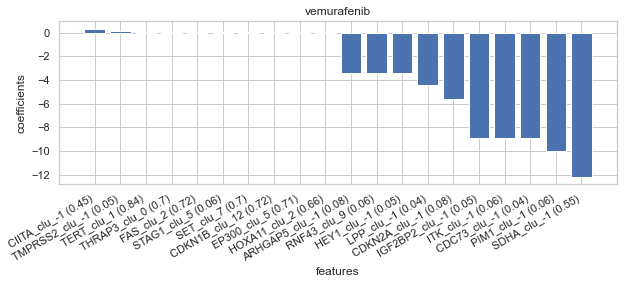

In [11]:
topn, genes = show_features(f, drug_name = drug_name, top_n = 20, save= False, save_path= 
                           '/Users/jerryliu/jerry_jupyter/internship/files/figures/feature_selection/ratio_weight')
print(genes)

TW-37
CYLD_clu_-1    -0.013622
MYCL_clu_6     -0.015892
TFRC_clu_-1    -0.034328
MAFB_clu_-1     0.000263
KLF4_clu_4      0.010459
PTCH1_clu_3    -0.021975
CALR_clu_6     -0.044693
BUB1B_clu_-1   -0.051788
ACKR3_clu_8    -0.029723
SDC4_clu_5     -0.008514
PTPRK_clu_1    -0.019339
TET2_clu_-1    -0.034389
CD79A_clu_4    -0.017051
HRAS_clu_5     -0.041811
ATM_clu_7      -0.018173
dtype: float64
CI-976
TET2_clu_4       -0.120038
SRC_clu_0        -0.081570
ARHGAP5_clu_1     0.071232
GNAQ_clu_1       -0.066732
PTCH1_clu_3      -0.059817
ETV4_clu_6       -0.053796
PTPRB_clu_3      -0.063532
ERC1_clu_3       -0.051890
FANCE_clu_5      -0.065869
PAFAH1B2_clu_3    0.044702
FGFR2_clu_6      -0.055094
MITF_clu_8       -0.052877
PREX2_clu_6      -0.045633
ACKR3_clu_3       0.033798
NR4A3_clu_2       0.046580
dtype: float64
vemurafenib
POU5F1_clu_8    -0.194227
TERT_clu_1       0.067256
HOXA11_clu_-1   -0.748274
BLM_clu_7       -0.065293
BCL7A_clu_3     -0.056354
CDKN1B_clu_12    0.047158
SSX4_clu_

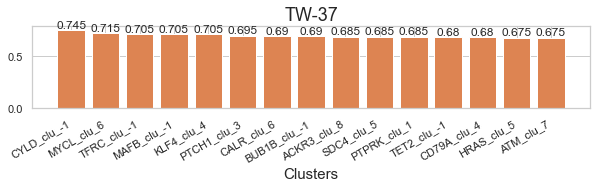

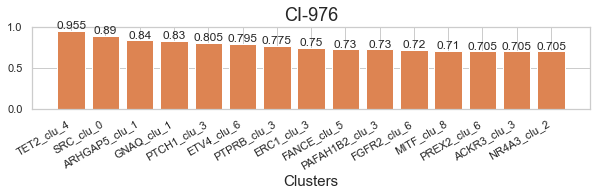

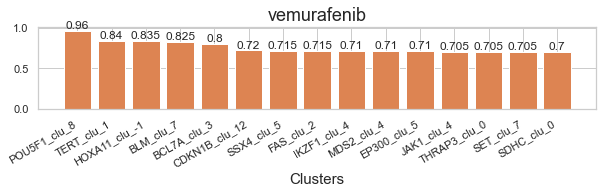

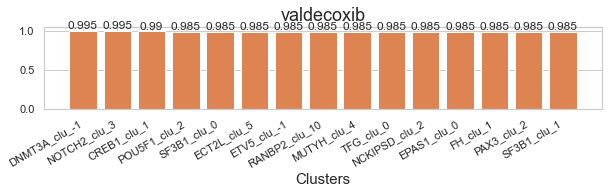

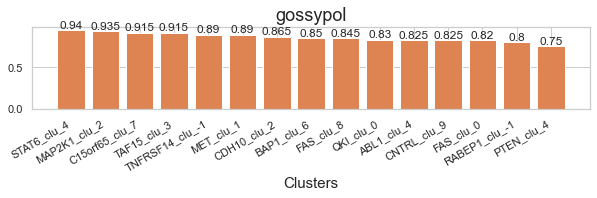

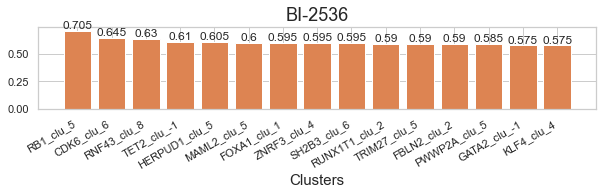

In [17]:
for i in range(6):
    f = pd.read_csv(f'{feature_path}/{f_list[i]}', index_col = 0)
    drug_name = f_list[i].split()[0].strip()
    topn, genes = show_features_ocur(f, drug_name = drug_name, sort_by_w= False, top_n = 15, save= True, 
                                     show_weight = True,
                                     save_path= '/Users/jerryliu/jerry_jupyter/internship/files/figures/thesis_fig')
    print(drug_name)
    print(topn)
        

vemurafenib
feature_index_ is: 1367
feature_index (no outliers) is: 1234


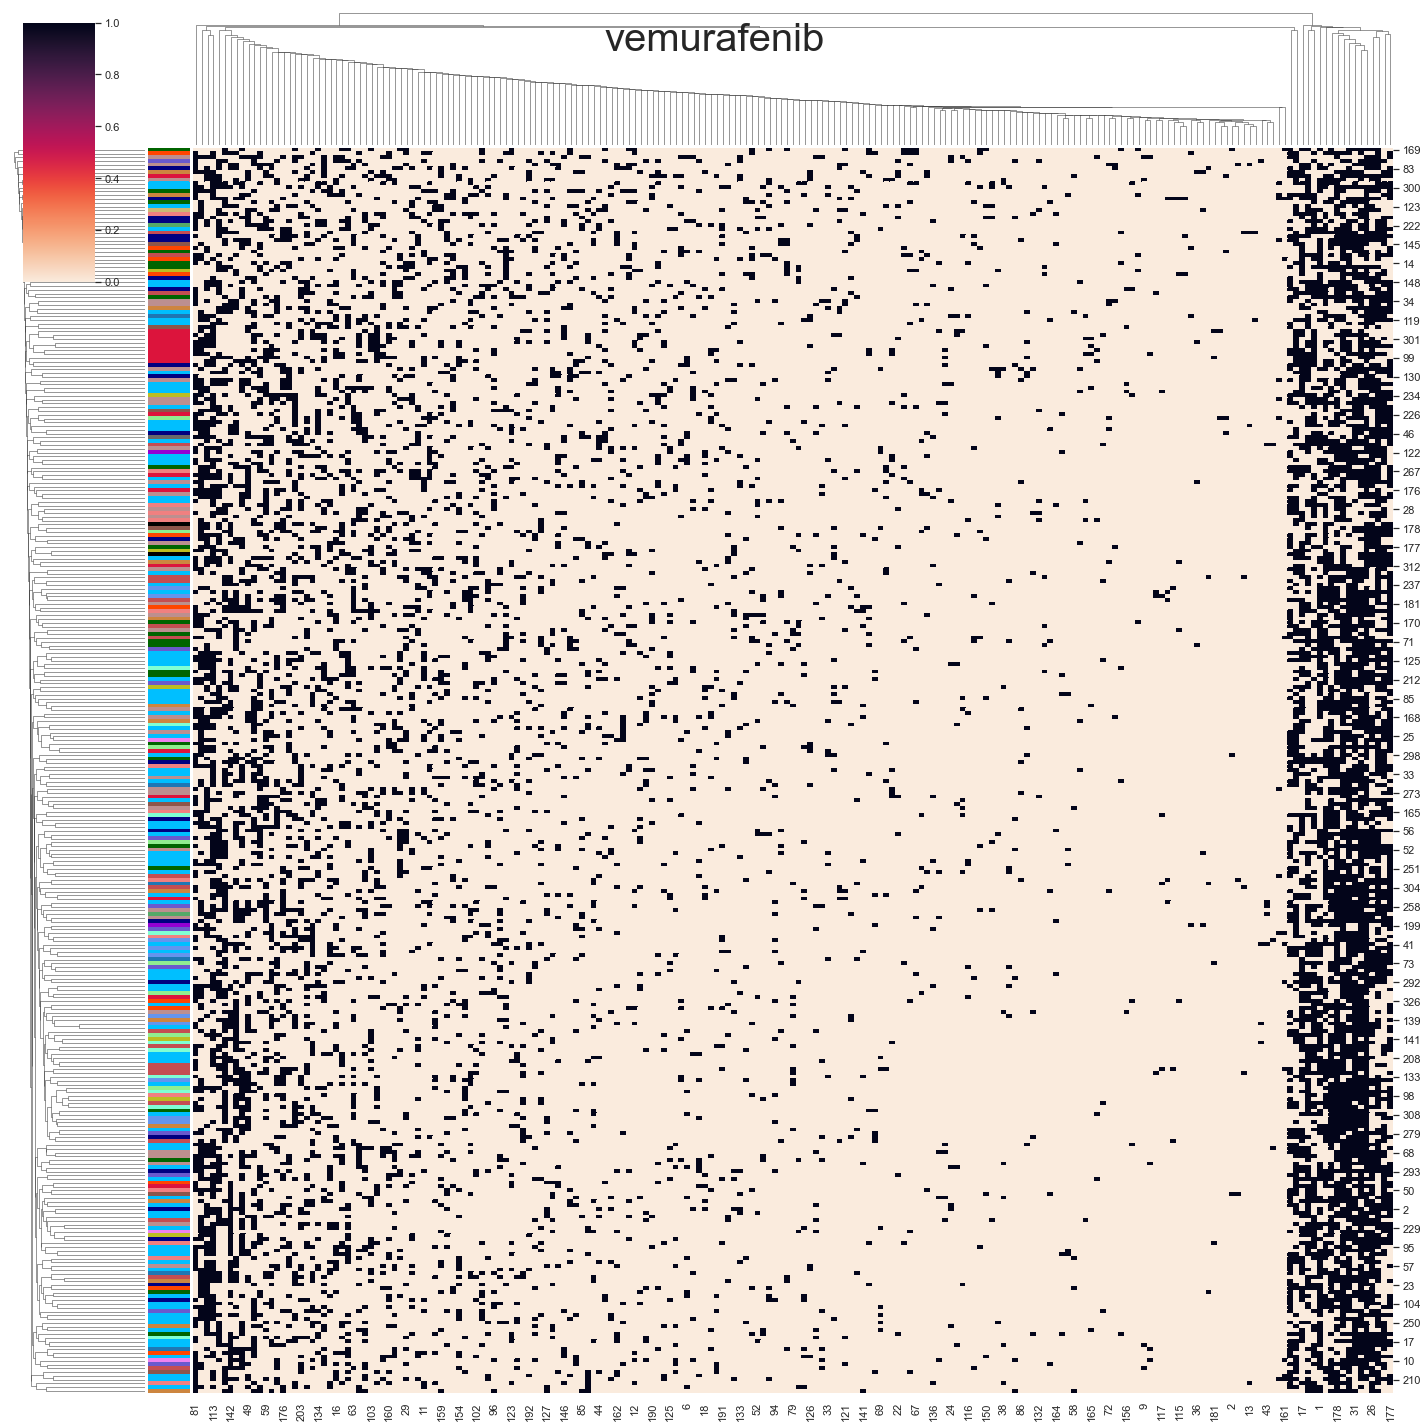

In [293]:
## Show occurence.
f_index= 2
f = pd.read_csv(f'{feature_path}/{f_list[f_index]}', index_col = 0)
drug_name = f_list[f_index].split()[0].strip()
print(drug_name)
ratio, genes = show_features_ocur(f, drug_name = drug_name, 
                                  sort_by_w = False,
                                  top_n = 205, save= False, show = False)

DF = pd.read_csv('/Users/jerryliu/jerry_jupyter/internship/files/DB_clusters.csv', index_col = 0)
run_df = pd.read_csv("/Users/jerryliu/Documents/Vu_uva/internship/CCLE/SraRunInfo.csv")

DF_ = DF.set_index([DF.index, 
              run_df.set_index('Run')['SampleName'][DF.index].map(lambda x:x.split('_',1)[1]).values])

colors = ['black', 'dimgray', 'rosybrown', 'lightcoral', 'orangered', 'peru', 'lightgreen',
         'darkgreen', 'aquamarine', 'deepskyblue', 'cornflowerblue', 'navy', 'slateblue',
         'darkviolet', 'violet', 'crimson', 'y','tab:olive', 'r', 'g','tab:blue','tab:brown' ]

tissue_map = dict(zip(np.unique(DF_.index.map(lambda x:x[1])), colors  ))

col_map = DF_.index.map(lambda x:x[1]).map(tissue_map)

feature_index_ = f.columns[f.columns.map(lambda x:x.split('_clu_')[0].strip()).isin(genes) ]
feature_index = remove_outlier(f.columns[f.columns.map(lambda x:x.split('_clu_')[0].strip()).isin(genes) ])
print(f'feature_index_ is: {len(feature_index_)}')
print(f'feature_index (no outliers) is: {len(feature_index)}')
cmap = sns.cm.rocket_r
g = sns.clustermap(DF_.loc[:, ratio.index].values, col_cluster = True, row_colors=list(col_map), 
                       cmap = cmap,
                       figsize=(20, 20),
                       vmin=1, vmax=0.0,
                       dendrogram_ratio=0.1
                       );
g.fig.suptitle(drug_name, fontsize=40) 
g.savefig(f'/Users/jerryliu/jerry_jupyter/internship/files/figures/feature_selection/top20/{drug_name}.pdf')


In [276]:
f_index= 2
f = pd.read_csv(f'{feature_path}/{f_list[f_index]}', index_col = 0)
drug_name = f_list[f_index].split()[0].strip()
print(drug_name)
topn, genes = show_features_ocur(f, drug_name = drug_name, top_n = 190, sort_by_w = False, save= False, show = False)

vemurafenib


In [269]:
pos_genes  = np.unique(topn[topn > 0].index.map(lambda x: x.split('_clu_')[0].strip()))
neg_genes = np.unique(topn[topn < 0].index.map(lambda x: x.split('_clu_')[0].strip()))

In [7]:
def remove_outlier(index_list):
    return(index_list[index_list.map(lambda x:x.split('_clu_')[-1].strip() != '-1')])

In [271]:
feature_index_ = f.columns[f.columns.map(lambda x:x.split('_clu_')[0].strip()).isin(genes) ]
feature_index = remove_outlier(f.columns[f.columns.map(lambda x:x.split('_clu_')[0].strip()).isin(genes) ])
feature_index_pos =  remove_outlier(f.columns[f.columns.map(lambda x:x.split('_clu_')[0].strip()).isin(pos_genes) ])
feature_index_neg =  remove_outlier(f.columns[f.columns.map(lambda x:x.split('_clu_')[0].strip()).isin(neg_genes) ])
topn_index_pos = topn[topn > 0].index
topn_index_neg = topn[topn < 0].index


In [272]:
DF = pd.read_csv('/Users/jerryliu/jerry_jupyter/internship/files/DB_clusters.csv', index_col = 0)
run_df = pd.read_csv("/Users/jerryliu/Documents/Vu_uva/internship/CCLE/SraRunInfo.csv")

DF_ = DF.set_index([DF.index, 
              run_df.set_index('Run')['SampleName'][DF.index].map(lambda x:x.split('_',1)[1]).values])

colors = ['black', 'dimgray', 'rosybrown', 'lightcoral', 'orangered', 'peru', 'lightgreen',
         'darkgreen', 'aquamarine', 'deepskyblue', 'cornflowerblue', 'navy', 'slateblue',
         'darkviolet', 'violet', 'crimson', 'y','tab:olive', 'r', 'g','tab:blue','tab:brown' ]

tissue_map = dict(zip(np.unique(DF_.index.map(lambda x:x[1])), colors  ))

col_map = DF_.index.map(lambda x:x[1]).map(tissue_map)

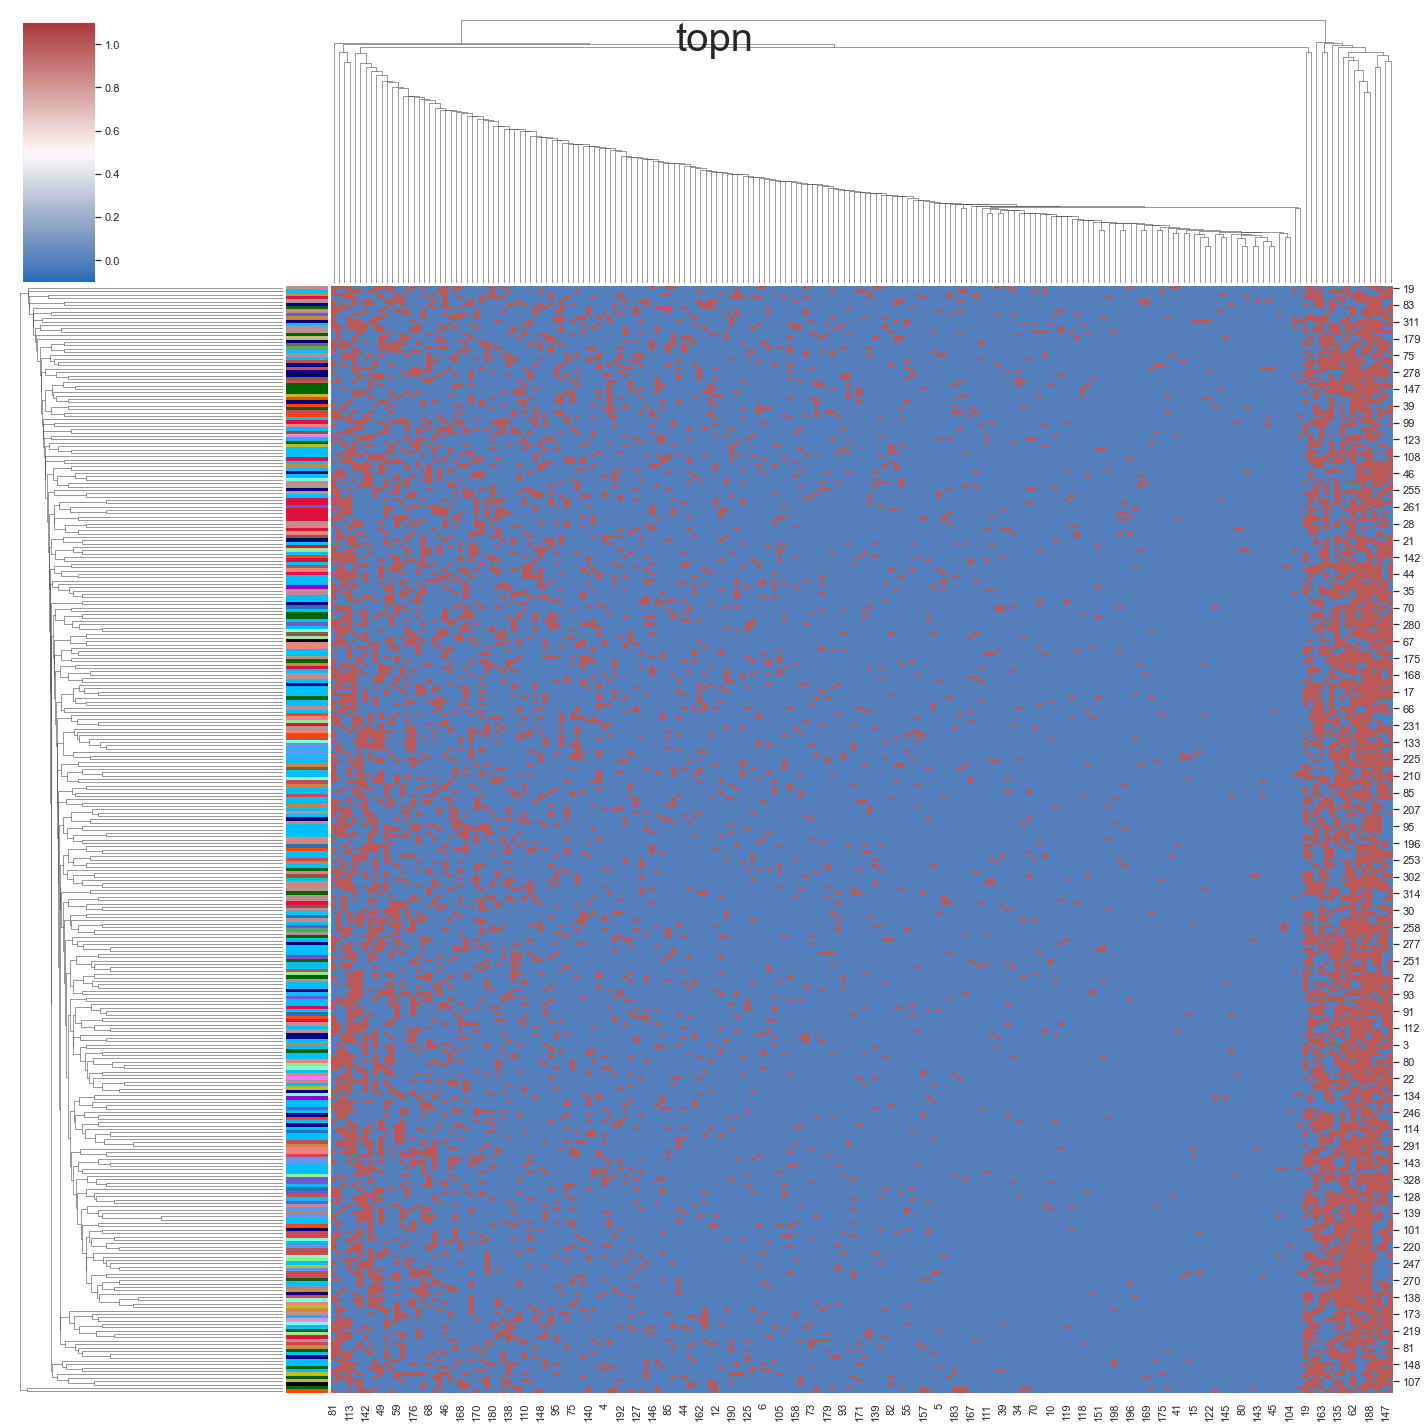

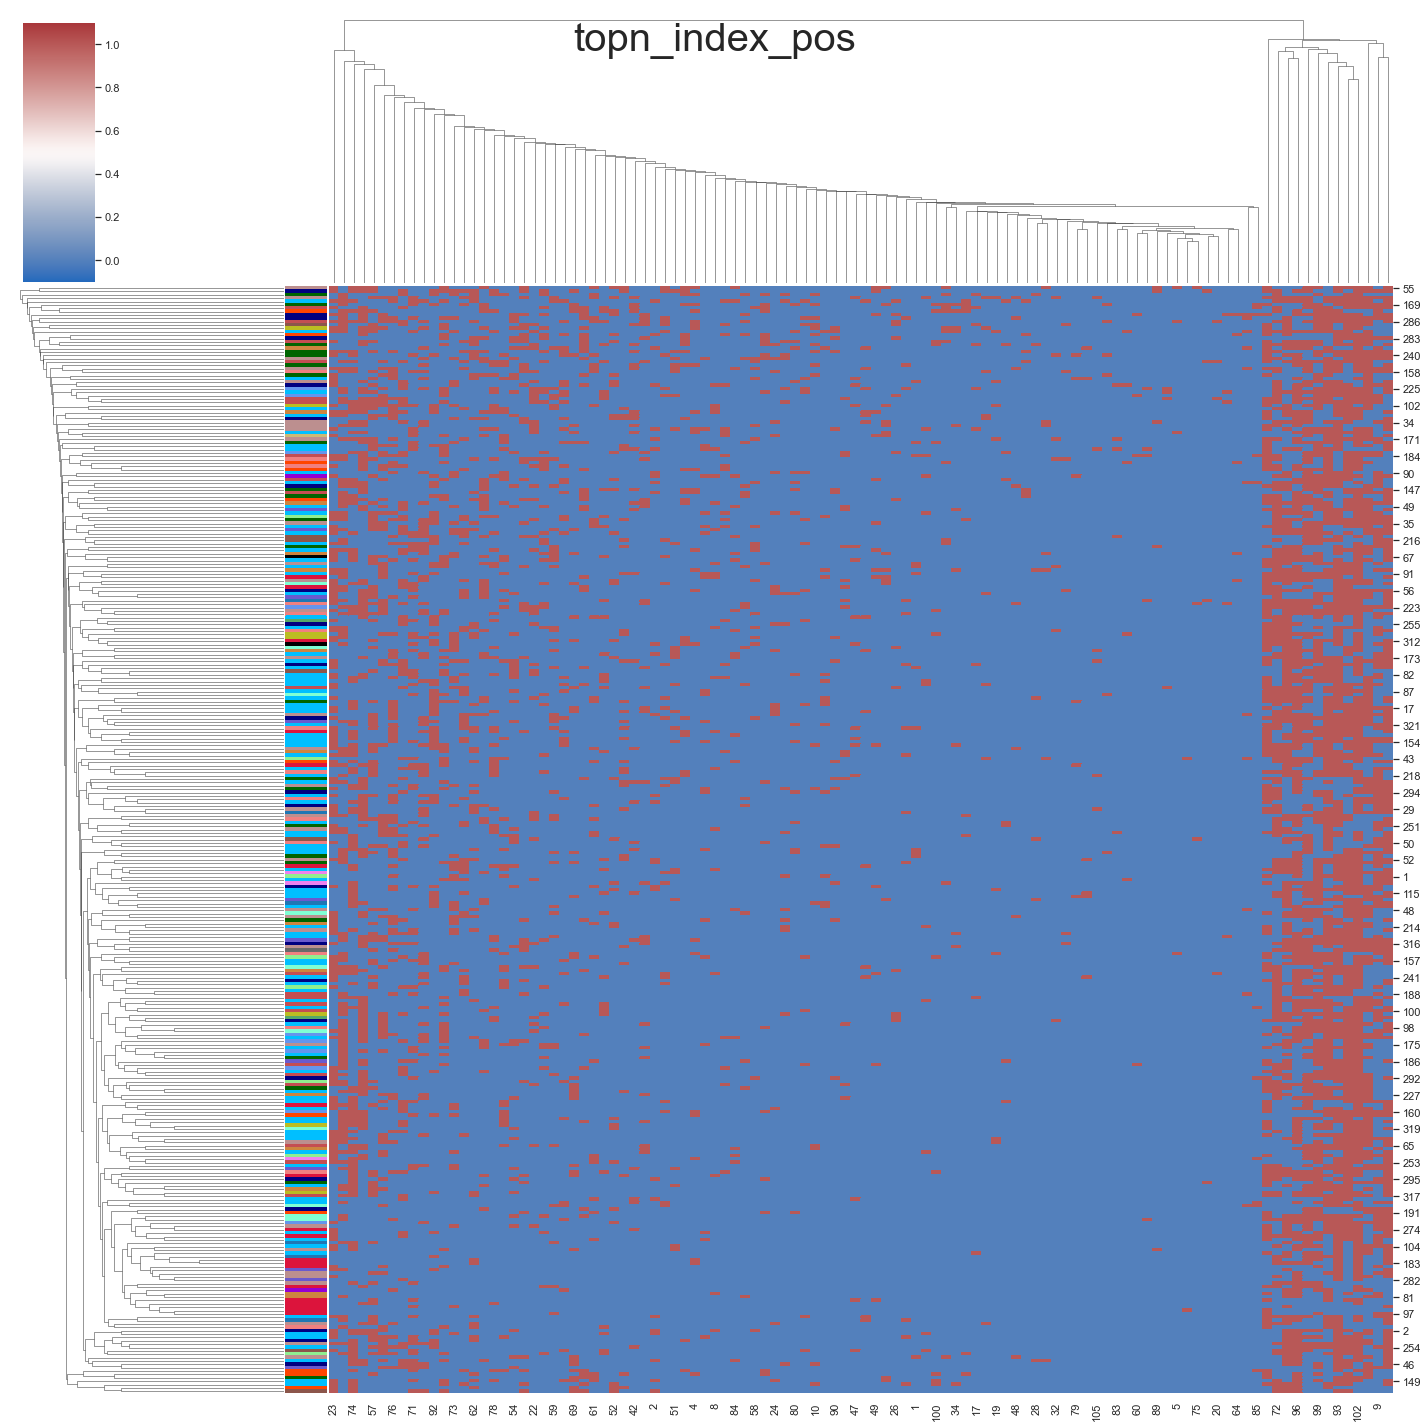

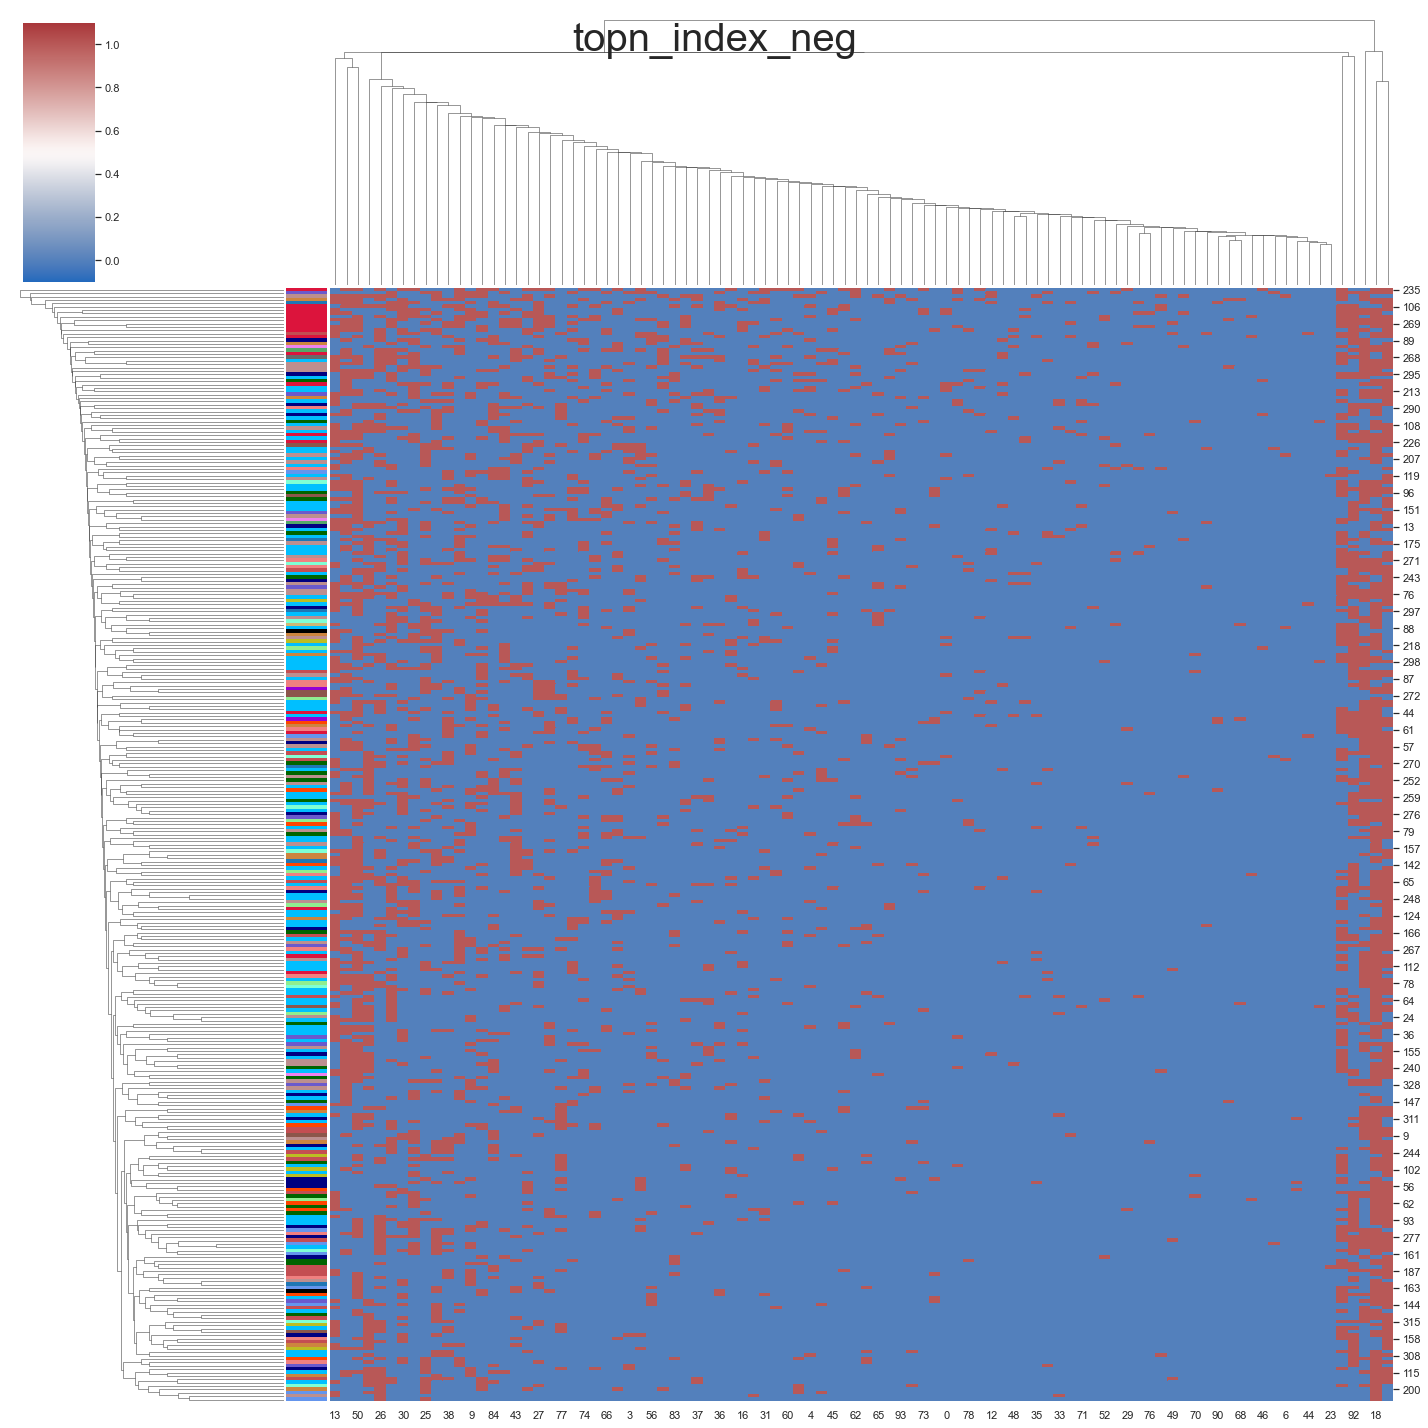

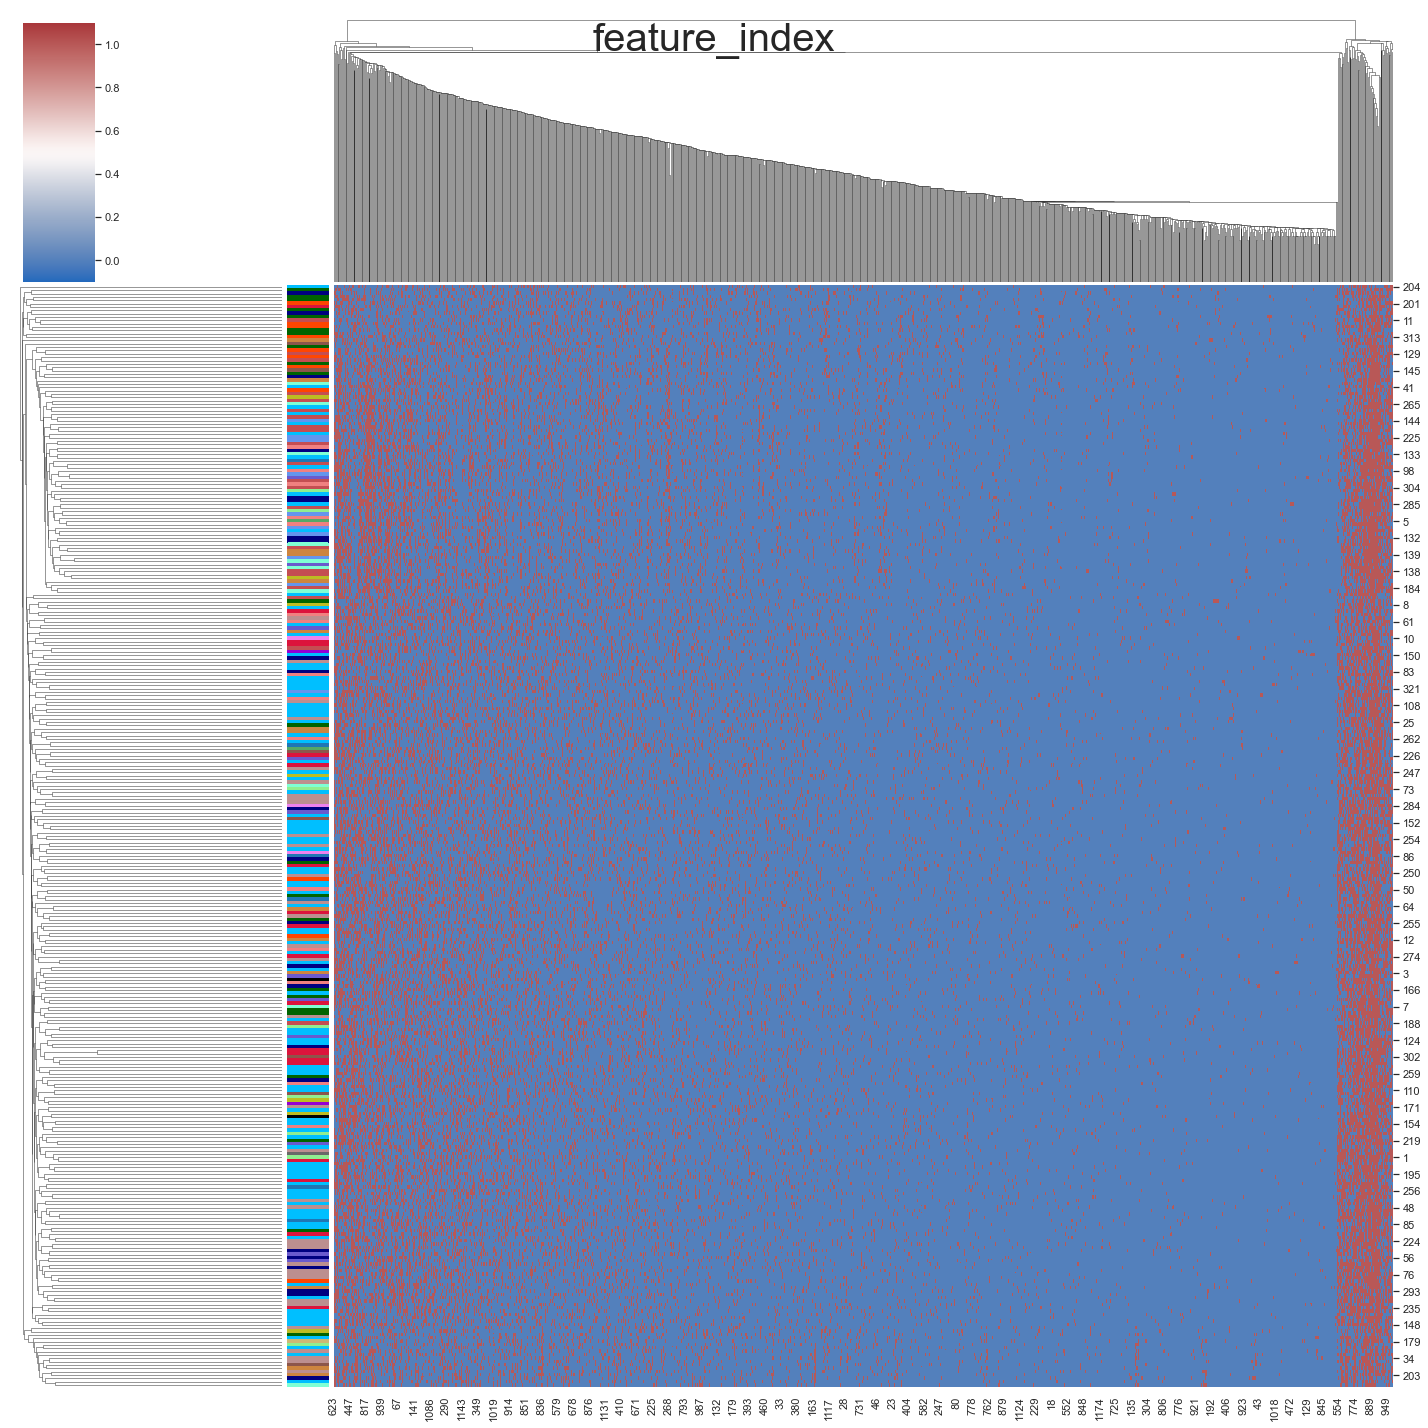

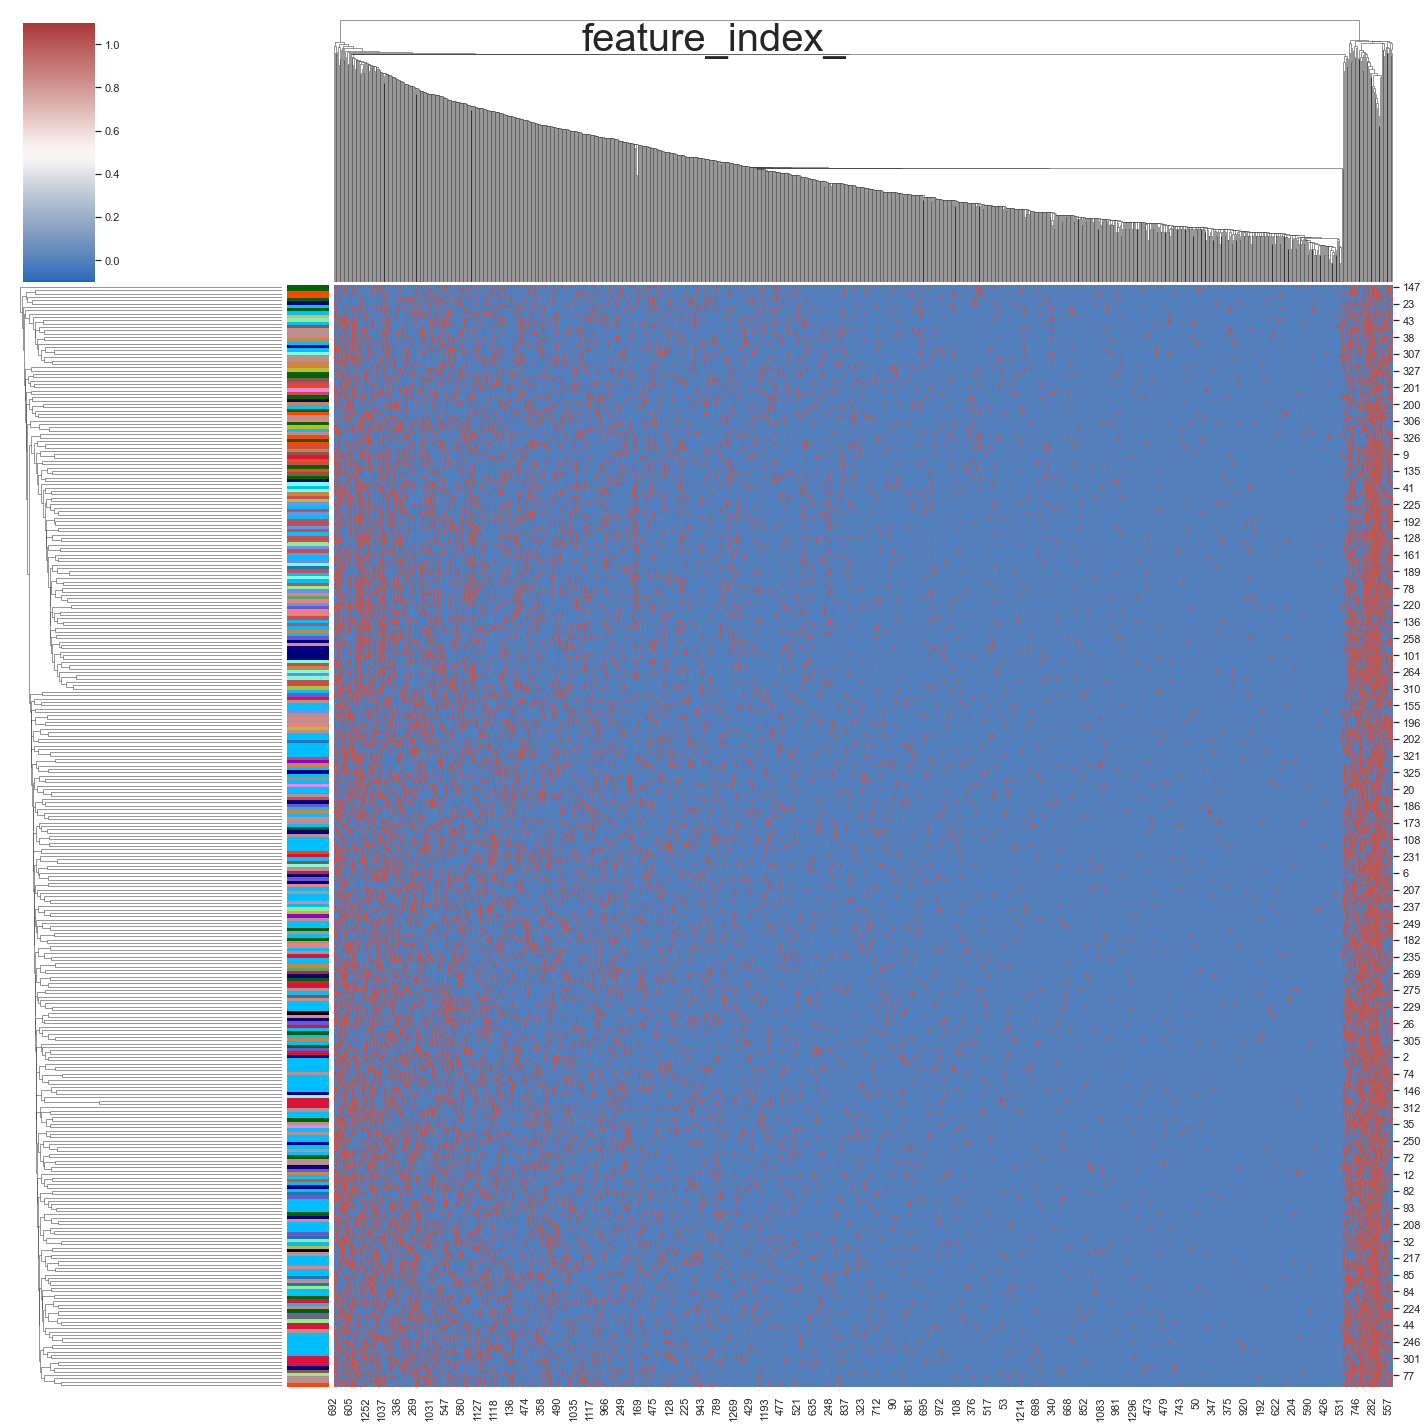

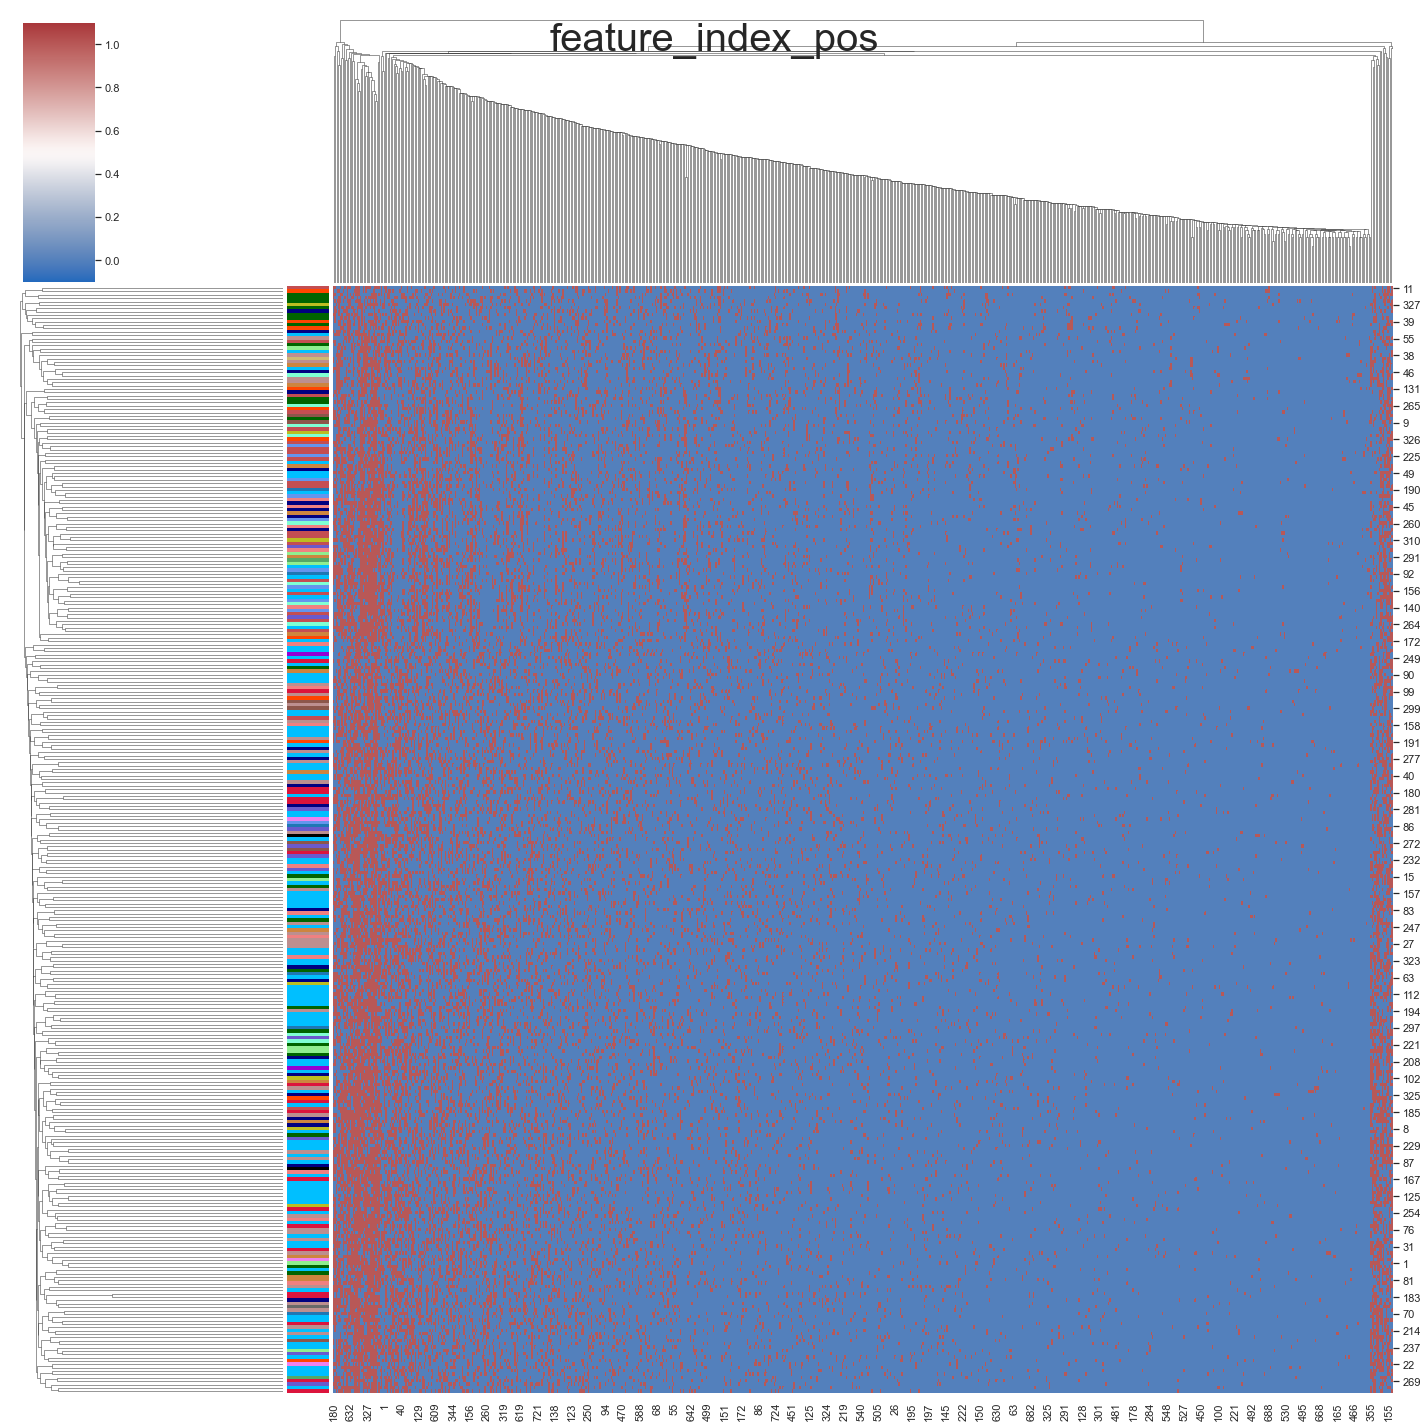

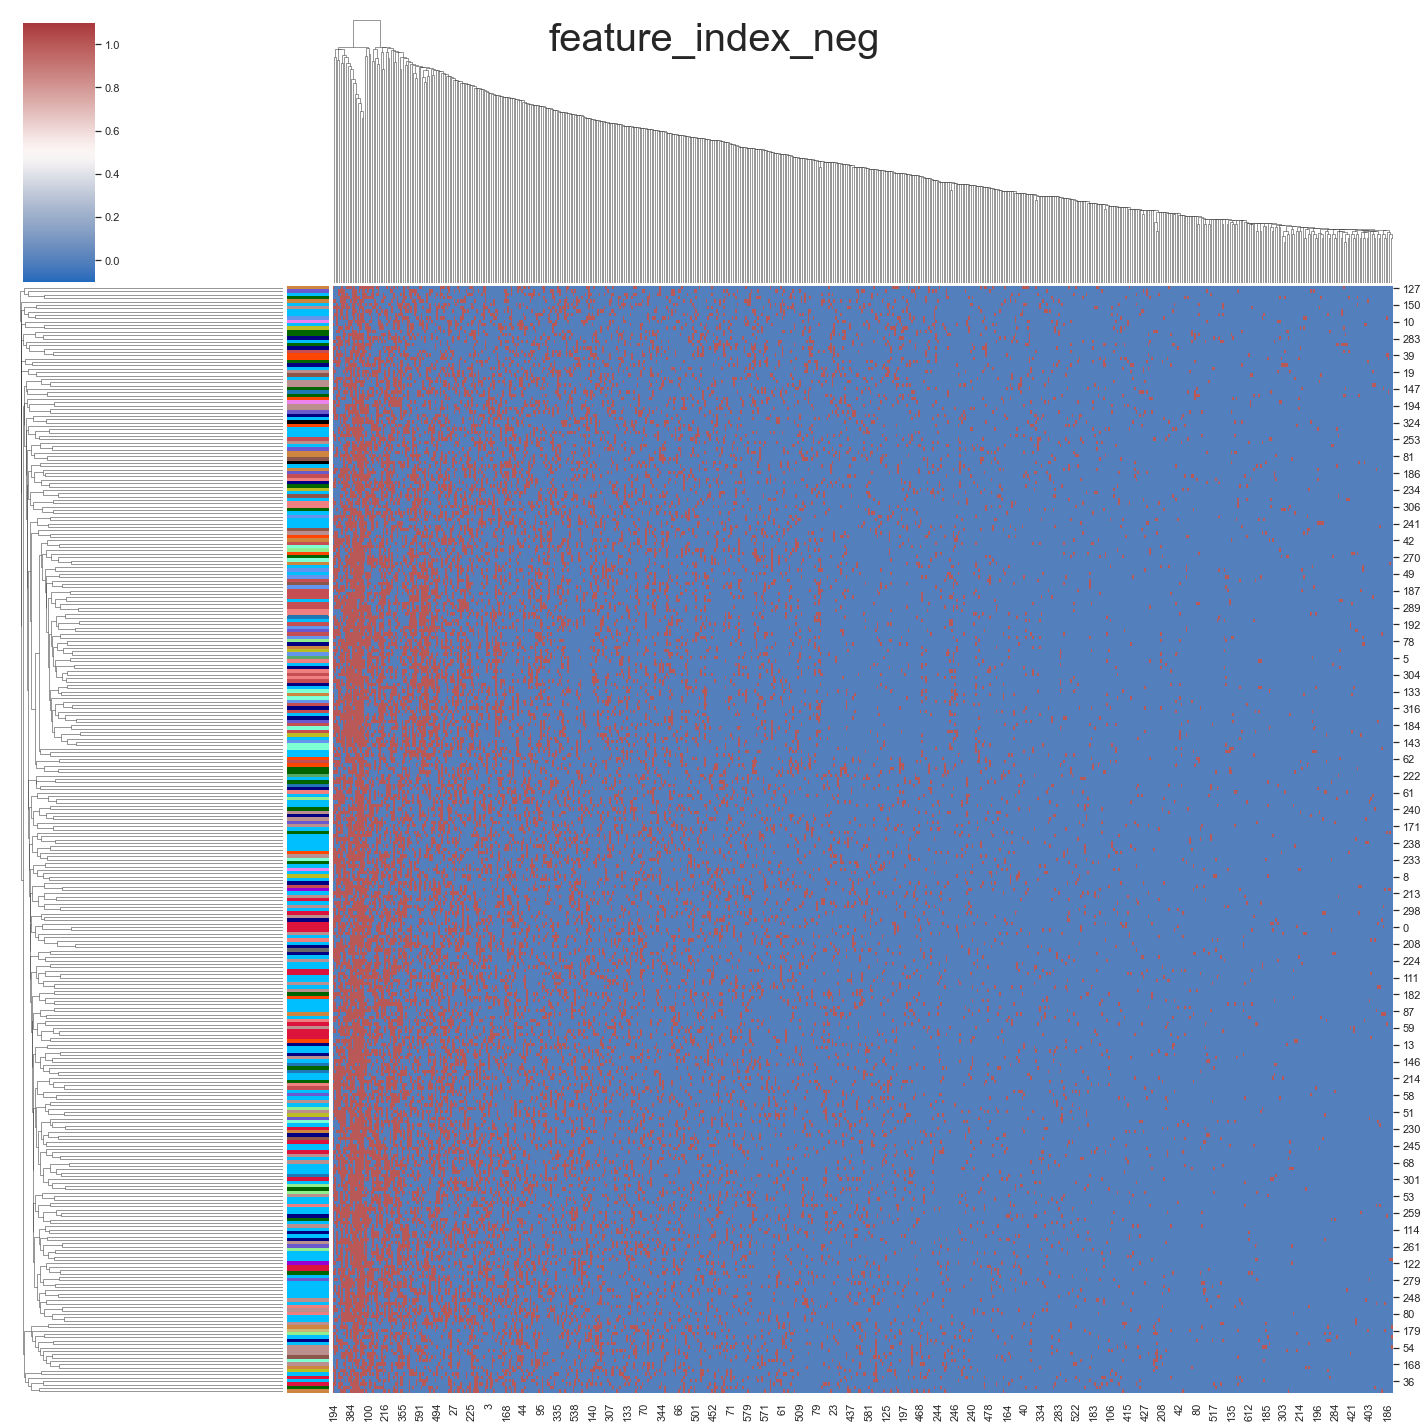

In [273]:
index_list = [('topn', topn.index), ('topn_index_pos', topn_index_pos), ('topn_index_neg', topn_index_neg),
             ('feature_index', feature_index ), ('feature_index_' ,  feature_index_ ), 
              ('feature_index_pos' , feature_index_pos), ('feature_index_neg' , feature_index_neg)]
for i, j in index_list:
    g = sns.clustermap(DF_.loc[:, j].values, col_cluster = True, row_colors=list(col_map), cmap="vlag", 
                       figsize=(20, 20),
                       vmin=-0.1, vmax=1.1);
    g.fig.suptitle(i, fontsize=40) 